# S&P500 Stocks Data Analysis

## 1 . Introduction

### Overview

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on m stock exchanges (including the 30 companies that compose the Dow Jones Industrial Average), and includes about 80 percent of the American equity market by capitalization.<br>
We will be analysing this dataset by using various models, helping us to choose the best model to predict the Earnings before interest, taxes, depreciation, and amortization(EBITDA) for the S&P500 stocks.

### Dataset Overview

The data is from public data recourse: https://www.kaggle.com/paytonfisher/s-p-500-analysis-using-r

The dataset has 505 observations and 14 variables, and it provides the details of all 505 stocks across the row. 
On a basic level it provides details like high and low of stock prices, market capitaliztion and earnings per share of all stocks.
The variables of the dataset are described below:

+ Symbol - It is an arrangement of characters—usually letters—representing stocks. Generally they are called ticker
+ Name - The Full name of the stock
+ Sector - The sector under which the stock is listed.
+ Price - The price of the stock. It is the current price of the stock.
+ Price/Earnings - It is the ratio of share price to its earnings per share.
+ Dividend Yield - It refers to the rate of return earned by the shareholders on their investment.
+ Earnings/Share - It indicates the profitability of a company. It is calculated by dividing the company’s net income with its total number of outstanding shares.
+ 52 Week Low - Lowest price of stock in a period of 52 weeks(One financial year)
+ 52 Week High - Highest price of stock in a period of 52 weeks(One financial year)
+ Market Cap - Total worth of the company as determined by the stock market.(the number of outstanding shares multiplied by the share price)
+ EBITDA - Earnings before interest, taxes, depreciation, and amortization.
+ Price/Sales - It is the ratio of market capitalization to the company's total sales or revenue over the past 12 months. The lower the P/S ratio, the more attractive the investment.
+ Price/Book - It is calculated by dividing the company's stock price per share by its book value per share. The P/B ratio reflects the value that market participants attach to a company's equity relative to the book value of its equity.
+ SEC Filings - Link to find SEC filings of a particular stock


**OBJECTIVE** : We are trying to determine the influence of predictors on the Earnings/Share of the stock.<br>

## 2 . Importing Libraries Packages and Dataset

In [1]:
install.packages("ggplot2")
install.packages("gridExtra") 
install.packages("caret")
install.packages("pls")
install.packages("plsr")
install.packages("treemap")

library(data.table)
library(ggplot2)
library(sqldf)
library(tidyverse)
library(dplyr)
library(GGally)
library(gridExtra) 
library(tidyverse)
library(ggplot2)
library(GGally)
library(caret)
library(corrgram)
library(pls)
library(plsr)
library(treemap)

Installing package into 'C:/Users/kisho/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kisho\AppData\Local\Temp\RtmpWGn53K\downloaded_packages


Installing package into 'C:/Users/kisho/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kisho\AppData\Local\Temp\RtmpWGn53K\downloaded_packages


Installing package into 'C:/Users/kisho/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kisho\Documents\R\win-library\4.1\00LOCK\caret\libs\x64\caret.dll to C:\Users\kisho\Documents\R\win-library\4.1\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\kisho\AppData\Local\Temp\RtmpWGn53K\downloaded_packages


Installing package into 'C:/Users/kisho/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kisho\AppData\Local\Temp\RtmpWGn53K\downloaded_packages


Installing package into 'C:/Users/kisho/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'plsr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kisho\AppData\Local\Temp\RtmpWGn53K\downloaded_packages


Installing package into 'C:/Users/kisho/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'treemap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kisho\AppData\Local\Temp\RtmpWGn53K\downloaded_packages


Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: lattice


Attaching package: 'caret'




In [2]:
# Loading Data
stocks <- read.csv(
  file = "C:/Users/kisho/Downloads/financials.csv",
  header = TRUE,
  stringsAsFactors = TRUE 
)

## 3. Data Cleaning and Rearranging

In [3]:
## Check the names of the column variables
colnames(stocks)

[1] "Symbol"         "Name"           "Sector"         "Price"         
 [5] "Price.Earnings" "Dividend.Yield" "Earnings.Share" "X52.Week.Low"  
 [9] "X52.Week.High"  "Market.Cap"     "EBITDA"         "Price.Sales"   
[13] "Price.Book"     "SEC.Filings"

In [4]:
# Variables names are long and tedious to type. Changing the variable names
names(stocks) <- c("symbol", "name", "sector", "price", "pe", "divyield",
                   "eps", "high", "low", "marketcap", "ebitda", "ps", "pb")

In [5]:
## Get rid of last column which provides link to SEC filings.
stocks <- subset(stocks, select = -c(14))

In [6]:
#Recheck Data and datatypes
names(stocks)
str(stocks)

[1] "symbol"    "name"      "sector"    "price"     "pe"        "divyield" 
 [7] "eps"       "high"      "low"       "marketcap" "ebitda"    "ps"       
[13] "pb"

'data.frame':	505 obs. of  13 variables:
 $ symbol   : Factor w/ 505 levels "A","AAL","AAP",..: 314 44 7 5 8 52 58 9 3 33 ...
 $ name     : Factor w/ 505 levels "3M Company","A.O. Smith Corp",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ sector   : Factor w/ 11 levels "Consumer Discretionary",..: 6 6 5 5 7 7 6 7 1 7 ...
 $ price    : num  222.9 60.2 56.3 108.5 150.5 ...
 $ pe       : num  24.3 27.8 22.5 19.4 25.5 ...
 $ divyield : num  2.33 1.15 1.91 2.5 1.71 ...
 $ eps      : num  7.92 1.7 0.26 3.29 5.44 1.28 7.43 3.39 6.19 0.03 ...
 $ high     : num  259.8 68.4 64.6 125.9 162.6 ...
 $ low      : num  175.5 48.9 42.3 60 114.8 ...
 $ marketcap: num  1.39e+11 1.08e+10 1.02e+11 1.81e+11 9.88e+10 ...
 $ ebitda   : num  9.05e+09 6.01e+08 5.74e+09 1.03e+10 5.64e+09 ...
 $ ps       : num  4.39 3.58 3.74 6.29 2.6 ...
 $ pb       : num  11.34 6.35 3.19 26.14 10.62 ...


In [7]:
#data cleaning
sum(is.na(stocks))

[1] 10

In [8]:
sum(is.na(stocks$eps))
sum(is.na(stocks$price))
sum(is.na(stocks$ebitda))
sum(is.na(stocks$divyield))
sum(is.na(stocks$market_cap))
sum(is.na(stocks$pe))
sum(is.na(stocks$low))
sum(is.na(stocks$high))
sum(is.na(stocks$ps))
sum(is.na(stocks$pb))
sum(is.na(stocks$symbol))
sum(is.na(stocks$name))
sum(is.na(stocks$sector))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 2

[1] 0

[1] 0

[1] 0

[1] 8

[1] 0

[1] 0

[1] 0

There are few empty values in pe and pb. These columns are derived columns and are not much importance. These columns will be removed eventually.

## 4 . Structural Analysis of the dataset

In [9]:
## Analyzing the structure of dataframe and types of variables present
str(stocks)
head(stocks)

'data.frame':	505 obs. of  13 variables:
 $ symbol   : Factor w/ 505 levels "A","AAL","AAP",..: 314 44 7 5 8 52 58 9 3 33 ...
 $ name     : Factor w/ 505 levels "3M Company","A.O. Smith Corp",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ sector   : Factor w/ 11 levels "Consumer Discretionary",..: 6 6 5 5 7 7 6 7 1 7 ...
 $ price    : num  222.9 60.2 56.3 108.5 150.5 ...
 $ pe       : num  24.3 27.8 22.5 19.4 25.5 ...
 $ divyield : num  2.33 1.15 1.91 2.5 1.71 ...
 $ eps      : num  7.92 1.7 0.26 3.29 5.44 1.28 7.43 3.39 6.19 0.03 ...
 $ high     : num  259.8 68.4 64.6 125.9 162.6 ...
 $ low      : num  175.5 48.9 42.3 60 114.8 ...
 $ marketcap: num  1.39e+11 1.08e+10 1.02e+11 1.81e+11 9.88e+10 ...
 $ ebitda   : num  9.05e+09 6.01e+08 5.74e+09 1.03e+10 5.64e+09 ...
 $ ps       : num  4.39 3.58 3.74 6.29 2.6 ...
 $ pb       : num  11.34 6.35 3.19 26.14 10.62 ...


,symbol,name,sector,price,pe,divyield,eps,high,low,marketcap,ebitda,ps,pb
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MMM,3M Company,Industrials,222.89,24.31,2.3328617,7.92,259.770,175.490,138721000000,9048000000,4.390271,11.34
2,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.1479592,1.70,68.390,48.925,10783419933,601000000,3.575483,6.35
3,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.9089824,0.26,64.600,42.280,102121000000,5744000000,3.740480,3.19
4,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.4995599,3.29,125.860,60.050,181386000000,10310000000,6.291571,26.14
5,ACN,Accenture plc,Information Technology,150.51,25.47,1.7144699,5.44,162.600,114.820,98765855553,5643228000,2.604117,10.62
6,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.4319032,1.28,74.945,38.930,52518668144,2704000000,10.595120,5.16


### Sector analysis  

In [10]:
# Creating new Dataframe to group sectors 
df_sector <- stocks %>%
  group_by(sector) %>%
    summarise(
      count = n(),
      avg.price = as.integer(mean(price)),
      med.pe = median(pe, na.rm = TRUE),
      avg.eps = mean(eps),
      cap = median(marketcap),
      ebitda = median(ebitda),
      ps = mean(ps),
      pb = median(pb, na.rm = TRUE)
)

df_sector

sector,count,avg.price,med.pe,avg.eps,cap,ebitda,ps,pb
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Consumer Discretionary,84,124,18.770,4.879048,14342772687,1962093500,2.275769,3.970
Consumer Staples,34,79,20.485,3.659412,30771781924,3011012500,2.869688,6.280
Energy,32,57,25.720,-1.648438,22005177414,2407000000,3.689595,2.190
Financials,68,89,16.300,4.436912,26622202518,0,3.358182,1.600
Health Care,61,132,19.925,4.340492,32295200000,1676204000,4.827239,3.850
Industrials,67,116,21.600,5.344030,19363059152,1635916000,2.573401,4.460
Information Technology,70,119,25.165,3.110000,26937142559,1667542000,5.880142,5.845
Materials,25,102,23.260,4.932000,16964162228,2152000000,2.876093,3.660
Real Estate,33,88,16.550,2.391212,14394715334,1260662000,9.962681,2.320


#### Creating the basic treemap to get a overview of number of stocks 

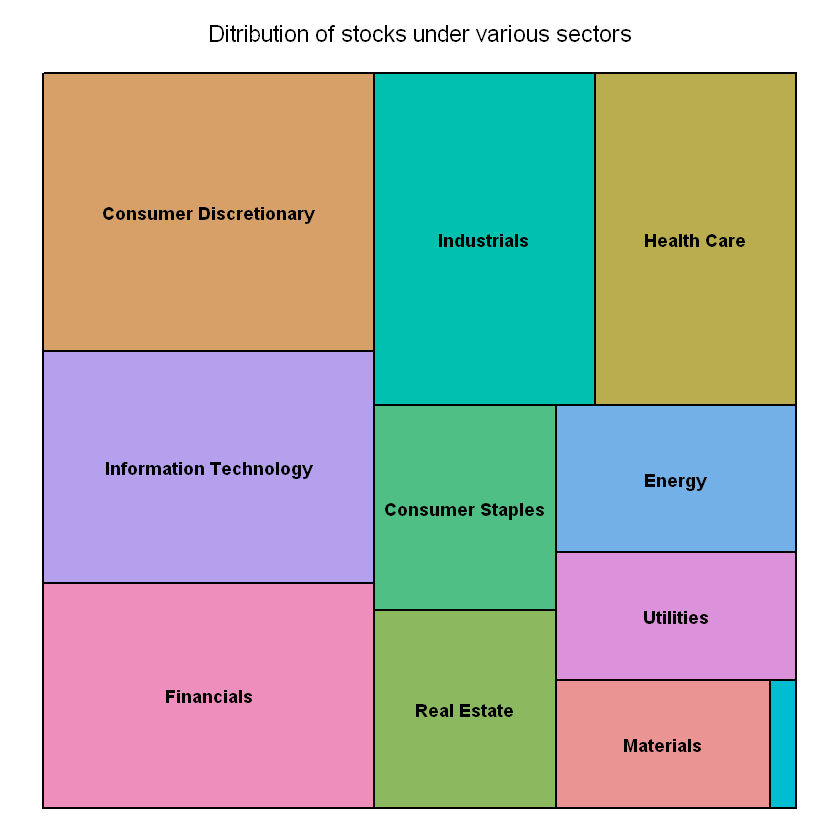

In [11]:
treemap(df_sector,index = c("sector"),vSize ="count" ,title="Ditribution of stocks under various sectors")

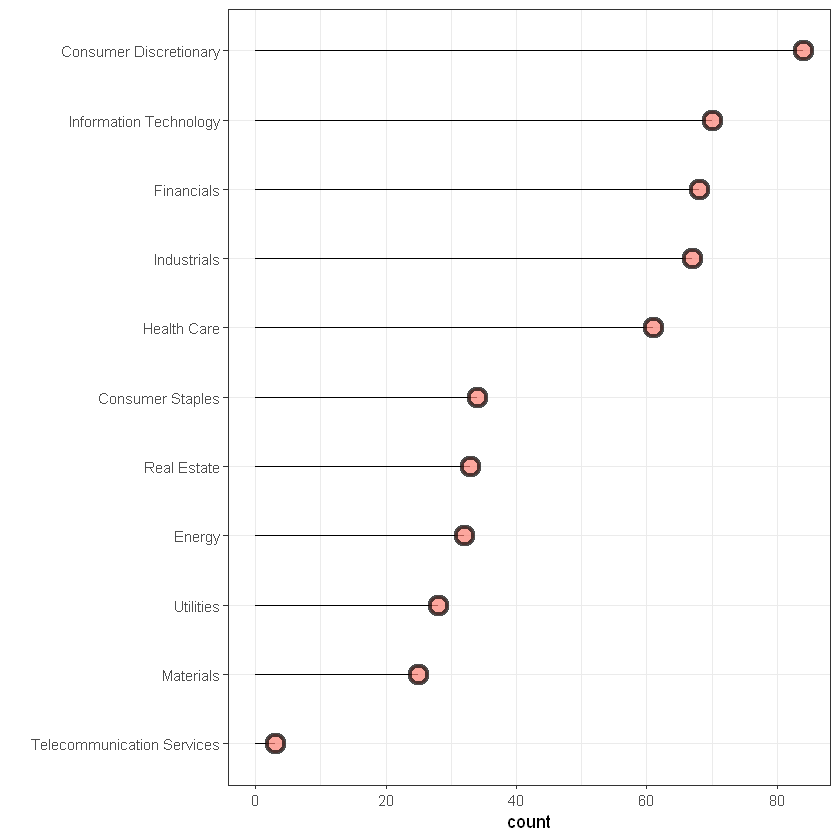

In [12]:
#Similar represntation in a different kind of plot
plot <- df_sector %>%
  arrange(count) %>%
  mutate(sector = factor(sector, levels = sector)) %>%
  ggplot(aes(x = sector, y = count)) +
  geom_segment(aes(xend = sector, yend = 0)) +
  geom_point(size = 4, color = "black", fill = alpha("salmon", 0.4), alpha = 0.7, shape = 21, stroke = 2) +
  coord_flip() +
  xlab("") +
  theme_bw()

plot

#### Treemap with Category(sector) and Subcategory(stocks name) as a hierarchy.

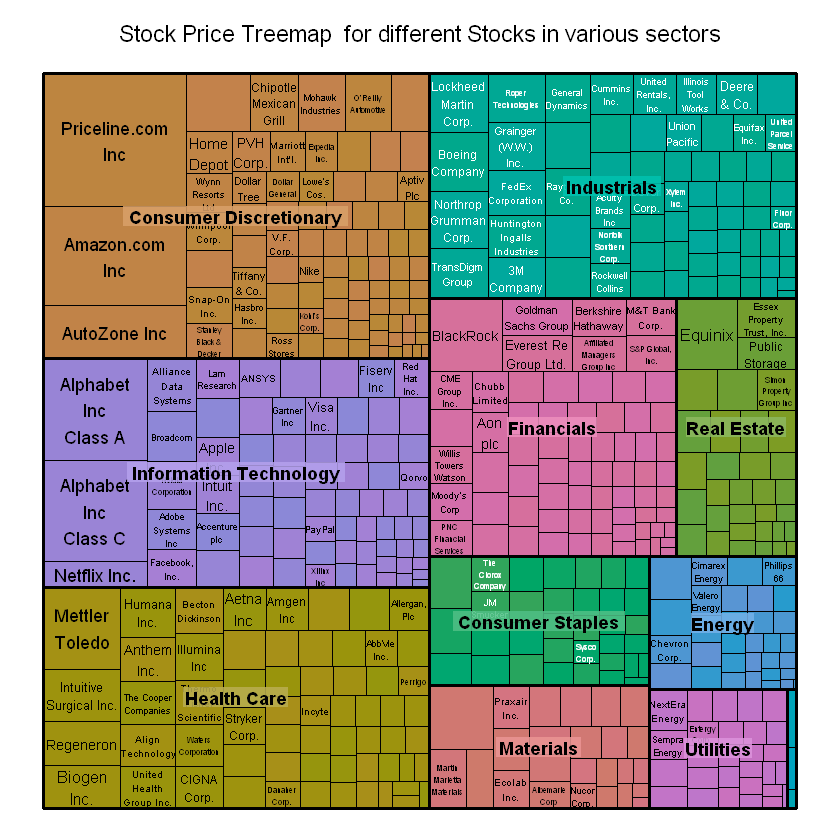

In [13]:
treemap(stocks,index = c("sector","name"),vSize = "price",title = "Stock Price Treemap  for different Stocks in various sectors")

#### Treemap depicting stocks prices by size and Market capitalization by colour density - Across all sectors

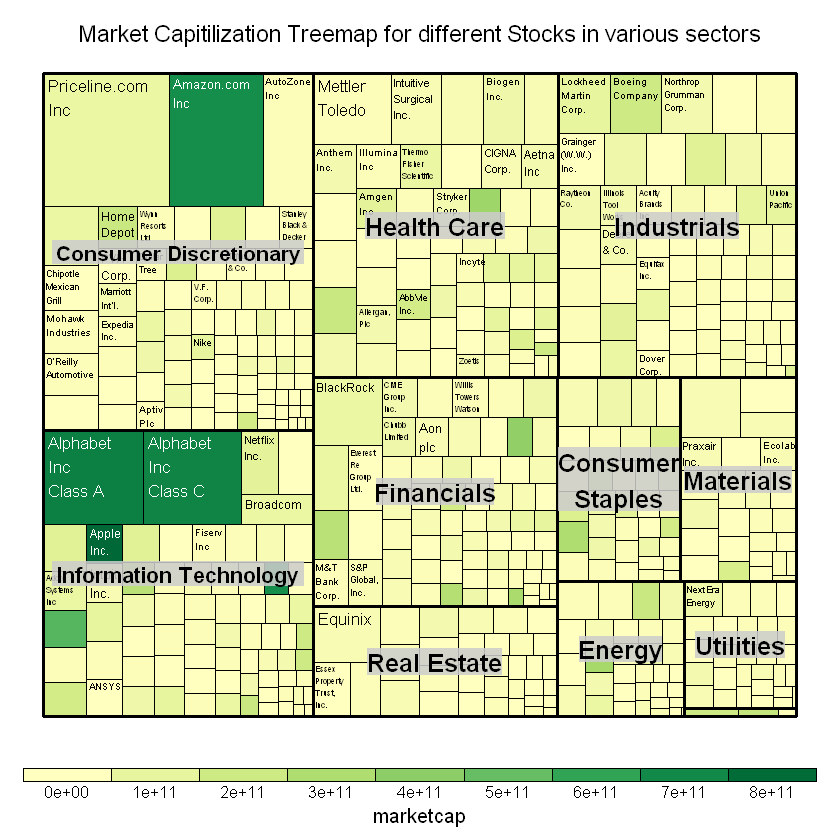

In [14]:
treemap(stocks,index = c("sector","name"),vSize = "price",vColor = "marketcap",type="value",title = "Market Capitilization Treemap for different Stocks in various sectors",fontsize.labels = c(15,10),align.labels = list(c("centre","centre"),c("left","top")))

#### Barplot of the sectors with the highest price

In [15]:
# Order stock prices from lowest to highest
df.price <- df_sector[order(df_sector$avg.price),]
df.price

sector,count,avg.price,med.pe,avg.eps,cap,ebitda,ps,pb
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Telecommunication Services,3,33,12.140,4.426667,208092000000,45745000000,1.511056,1.800
Utilities,28,55,17.960,2.014643,18458965305,2895500000,2.561081,1.910
Energy,32,57,25.720,-1.648438,22005177414,2407000000,3.689595,2.190
Consumer Staples,34,79,20.485,3.659412,30771781924,3011012500,2.869688,6.280
Real Estate,33,88,16.550,2.391212,14394715334,1260662000,9.962681,2.320
Financials,68,89,16.300,4.436912,26622202518,0,3.358182,1.600
Materials,25,102,23.260,4.932000,16964162228,2152000000,2.876093,3.660
Industrials,67,116,21.600,5.344030,19363059152,1635916000,2.573401,4.460
Information Technology,70,119,25.165,3.110000,26937142559,1667542000,5.880142,5.845


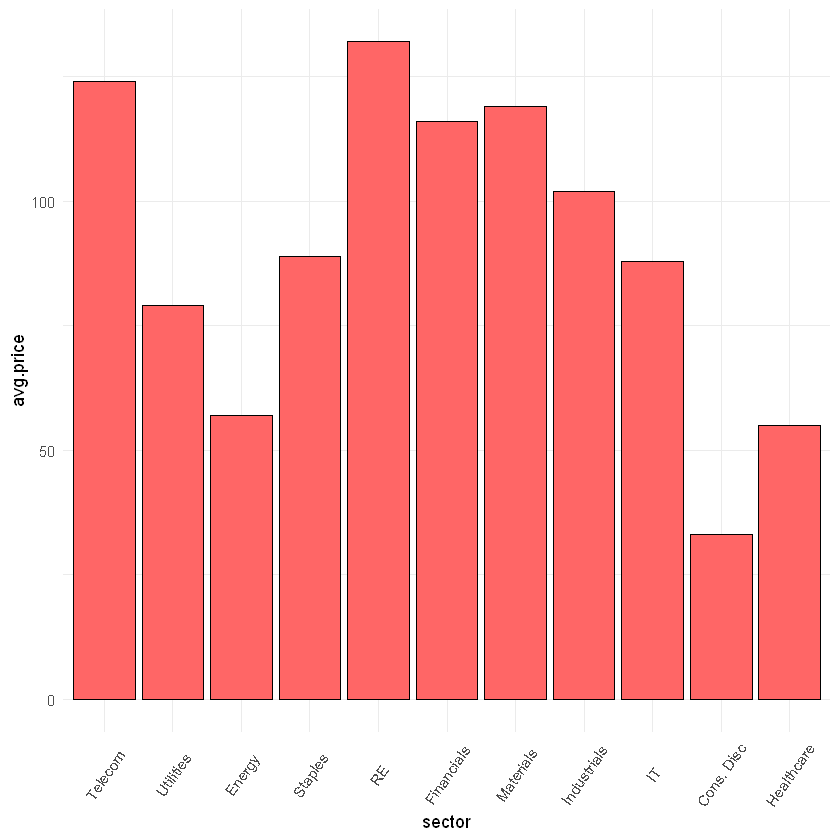

In [16]:
# Creating the bar plot

ggplot(data = df.price, aes(x = sector, y = avg.price)) +
  geom_bar(stat="identity", fill = "#ff6666", color = "black") +
  scale_x_discrete(labels=c("Telecom", "Utilities", "Energy", "Staples", "RE",
                            "Financials", "Materials", "Industrials", "IT",
                            "Cons. Disc", "Healthcare")) +
  theme_minimal() +theme(axis.text.x = element_text(angle=55, vjust=0.5))



#### Barplot of highest market capitalization

In [17]:

df.cap <- df_sector[order(df_sector$cap),]
df.cap$sector <- factor(df.cap$sector, levels = df.cap$sector)
df.cap

sector,count,avg.price,med.pe,avg.eps,cap,ebitda,ps,pb
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Consumer Discretionary,84,124,18.770,4.879048,14342772687,1962093500,2.275769,3.970
Real Estate,33,88,16.550,2.391212,14394715334,1260662000,9.962681,2.320
Materials,25,102,23.260,4.932000,16964162228,2152000000,2.876093,3.660
Utilities,28,55,17.960,2.014643,18458965305,2895500000,2.561081,1.910
Industrials,67,116,21.600,5.344030,19363059152,1635916000,2.573401,4.460
Energy,32,57,25.720,-1.648438,22005177414,2407000000,3.689595,2.190
Financials,68,89,16.300,4.436912,26622202518,0,3.358182,1.600
Information Technology,70,119,25.165,3.110000,26937142559,1667542000,5.880142,5.845
Consumer Staples,34,79,20.485,3.659412,30771781924,3011012500,2.869688,6.280


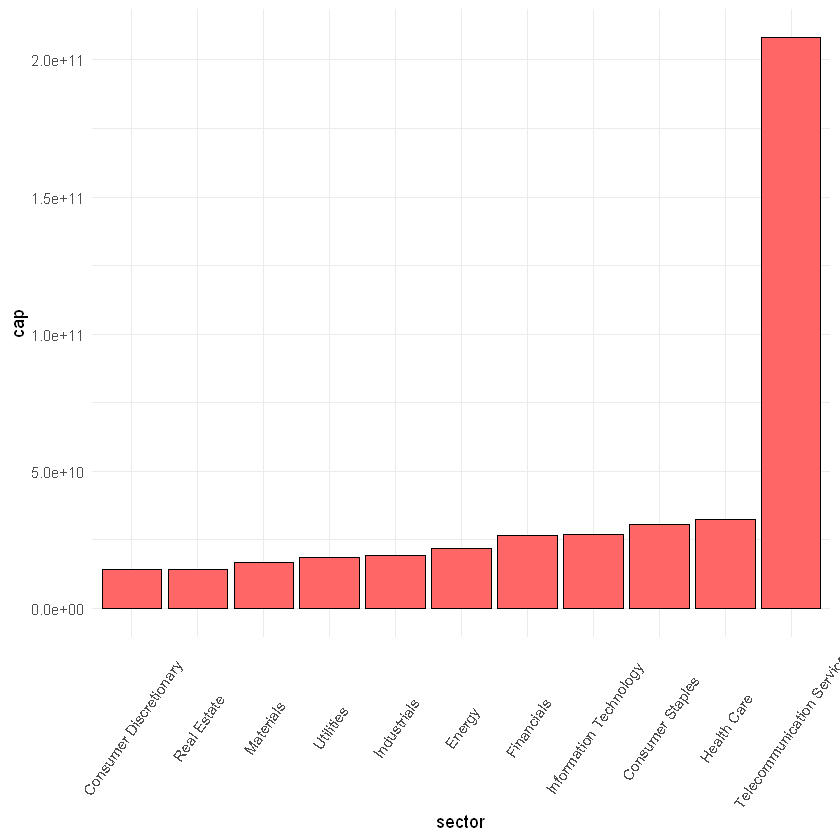

In [18]:
ggplot(data = df.cap, aes(x = sector, y = cap)) +
  geom_bar(stat="identity", fill = "#ff6666", color = "black") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle=55, vjust=0.5))


sector,count,avg.price,med.pe,avg.eps,cap,ebitda,ps,pb
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Consumer Discretionary,84,124,18.770,4.879048,14342772687,1962093500,2.275769,3.970
Real Estate,33,88,16.550,2.391212,14394715334,1260662000,9.962681,2.320
Materials,25,102,23.260,4.932000,16964162228,2152000000,2.876093,3.660
Utilities,28,55,17.960,2.014643,18458965305,2895500000,2.561081,1.910
Industrials,67,116,21.600,5.344030,19363059152,1635916000,2.573401,4.460
Energy,32,57,25.720,-1.648438,22005177414,2407000000,3.689595,2.190
Financials,68,89,16.300,4.436912,26622202518,0,3.358182,1.600
Information Technology,70,119,25.165,3.110000,26937142559,1667542000,5.880142,5.845
Consumer Staples,34,79,20.485,3.659412,30771781924,3011012500,2.869688,6.280


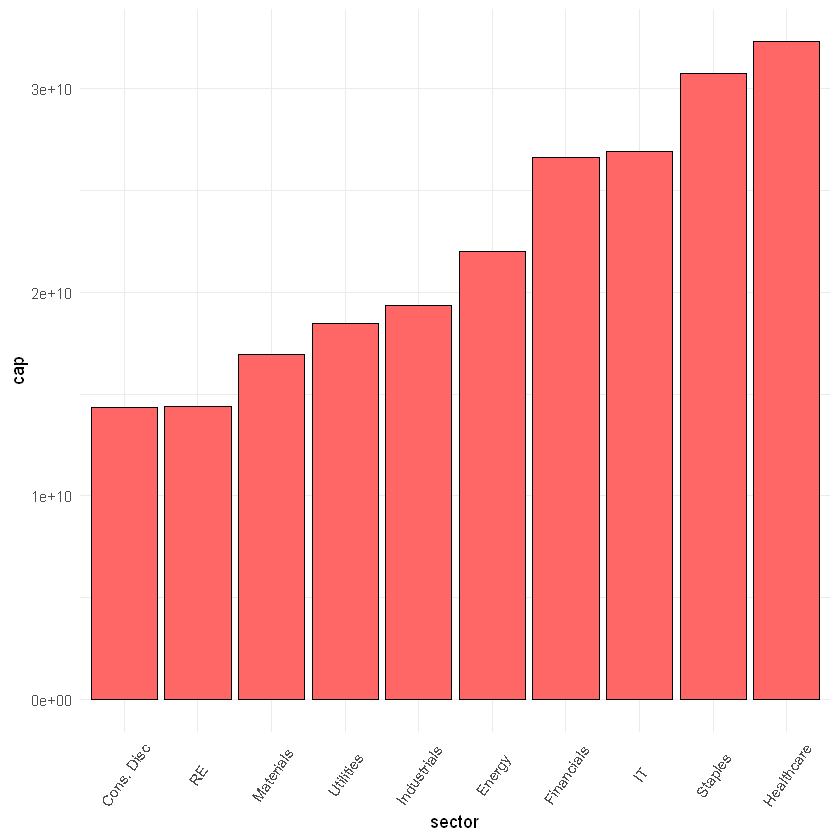

In [19]:
#telecom companies are skewing the data in its favor
# We will keep aside the telecom sector to get a better comparitive visualisation.

df.cap.new <- subset(df.cap, sector != "Telecommunication Services")
df.cap.new


ggplot(data = df.cap.new, aes(x = sector, y = cap)) +
  geom_bar(stat="identity", fill = "#ff6666", color = "black") +
  scale_x_discrete(labels=c("Cons. Disc", "RE", "Materials",
                            "Utilities", "Industrials","Energy",
                            "Financials","IT", "Staples", "Healthcare")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle=55, vjust=0.5))


## 5 . Correlation Analysis and Graphs

In [20]:
# we will start creating corr plot
# since pe and pb we will remove from our dataset
colnames(stocks)
head(stocks)

[1] "symbol"    "name"      "sector"    "price"     "pe"        "divyield" 
 [7] "eps"       "high"      "low"       "marketcap" "ebitda"    "ps"       
[13] "pb"

,symbol,name,sector,price,pe,divyield,eps,high,low,marketcap,ebitda,ps,pb
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MMM,3M Company,Industrials,222.89,24.31,2.3328617,7.92,259.770,175.490,138721000000,9048000000,4.390271,11.34
2,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.1479592,1.70,68.390,48.925,10783419933,601000000,3.575483,6.35
3,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.9089824,0.26,64.600,42.280,102121000000,5744000000,3.740480,3.19
4,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.4995599,3.29,125.860,60.050,181386000000,10310000000,6.291571,26.14
5,ACN,Accenture plc,Information Technology,150.51,25.47,1.7144699,5.44,162.600,114.820,98765855553,5643228000,2.604117,10.62
6,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.4319032,1.28,74.945,38.930,52518668144,2704000000,10.595120,5.16


There are few empty values in pe and pb. These columns are derived columns and do not have much influence. <br>
These columns will be removed from the dataset as they serve no true purpose.

In [21]:
stocks <- select(stocks , c(1,2,3,4,6,7,8,9,10,11,12))
colnames(stocks)
head(stocks)

[1] "symbol"    "name"      "sector"    "price"     "divyield"  "eps"      
 [7] "high"      "low"       "marketcap" "ebitda"    "ps"

,symbol,name,sector,price,divyield,eps,high,low,marketcap,ebitda,ps
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MMM,3M Company,Industrials,222.89,2.3328617,7.92,259.770,175.490,138721000000,9048000000,4.390271
2,AOS,A.O. Smith Corp,Industrials,60.24,1.1479592,1.70,68.390,48.925,10783419933,601000000,3.575483
3,ABT,Abbott Laboratories,Health Care,56.27,1.9089824,0.26,64.600,42.280,102121000000,5744000000,3.740480
4,ABBV,AbbVie Inc.,Health Care,108.48,2.4995599,3.29,125.860,60.050,181386000000,10310000000,6.291571
5,ACN,Accenture plc,Information Technology,150.51,1.7144699,5.44,162.600,114.820,98765855553,5643228000,2.604117
6,ATVI,Activision Blizzard,Information Technology,65.83,0.4319032,1.28,74.945,38.930,52518668144,2704000000,10.595120


In [22]:
#         Correlation analysis         #

corr  <- cor(stocks %>%  select(price,divyield,eps,low,high,marketcap,ebitda))         
corr          


,price,divyield,eps,low,high,marketcap,ebitda
price,1.0000000,-0.24462965,0.59106119,0.9827875,0.9950764,0.40647417,0.1803206
divyield,-0.2446296,1.00000000,-0.07723511,-0.2079531,-0.2444259,-0.02179357,0.1261334
eps,0.5910612,-0.07723511,1.00000000,0.6048940,0.5885947,0.19406267,0.1805832
low,0.9827875,-0.20795311,0.60489398,1.0000000,0.9848528,0.37558814,0.1796658
high,0.9950764,-0.24442592,0.58859470,0.9848528,1.0000000,0.39850371,0.1762775
marketcap,0.4064742,-0.02179357,0.19406267,0.3755881,0.3985037,1.00000000,0.7713442
ebitda,0.1803206,0.12613344,0.18058322,0.1796658,0.1762775,0.77134419,1.0000000


Finding the spread of values for each variable

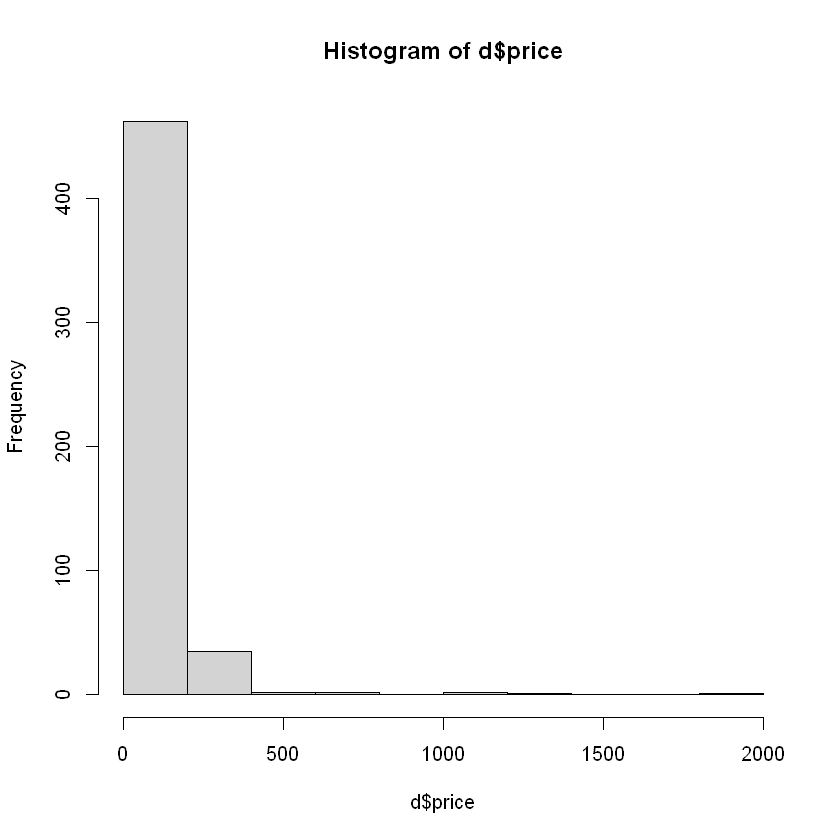

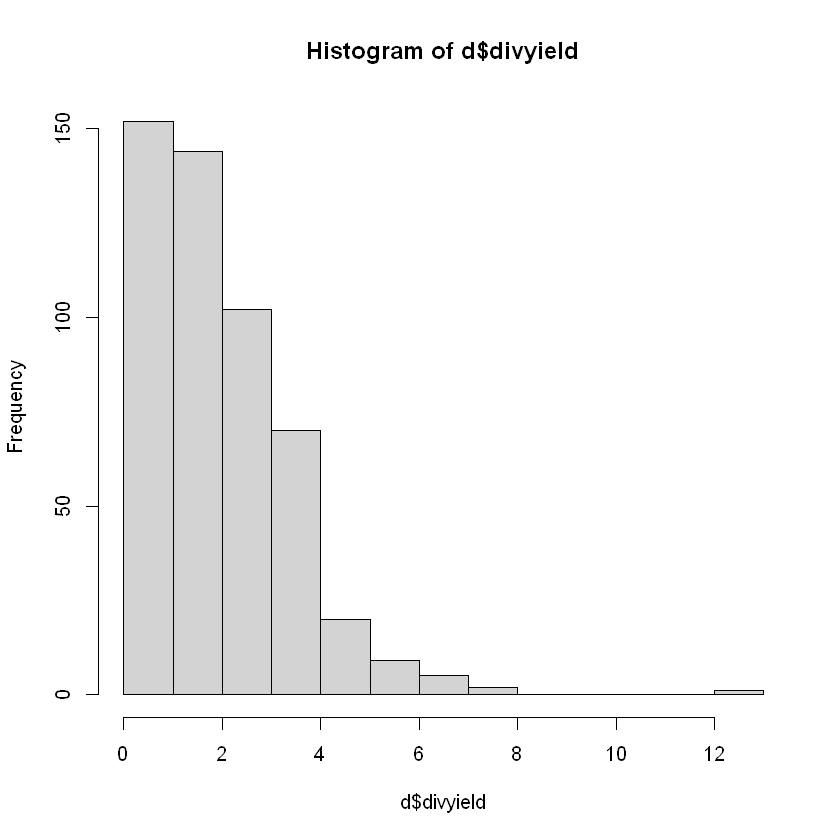

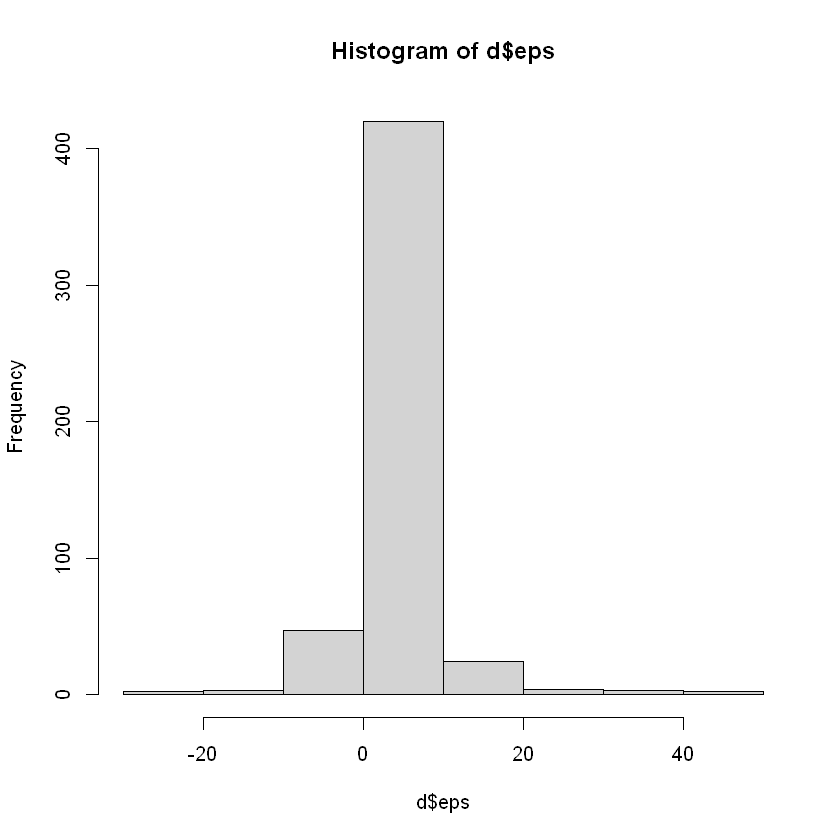

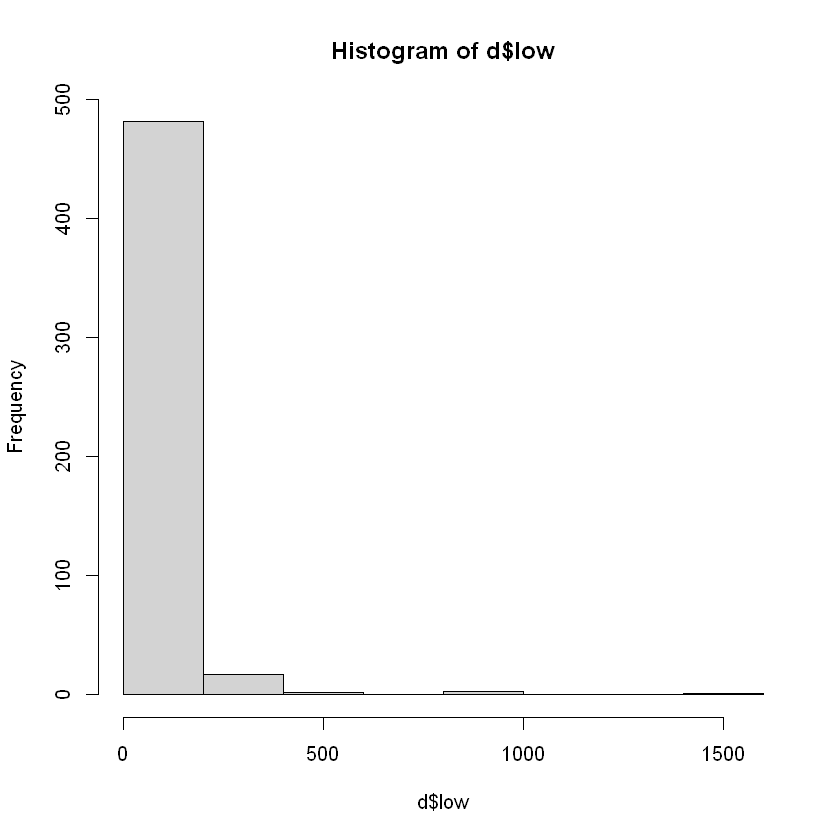

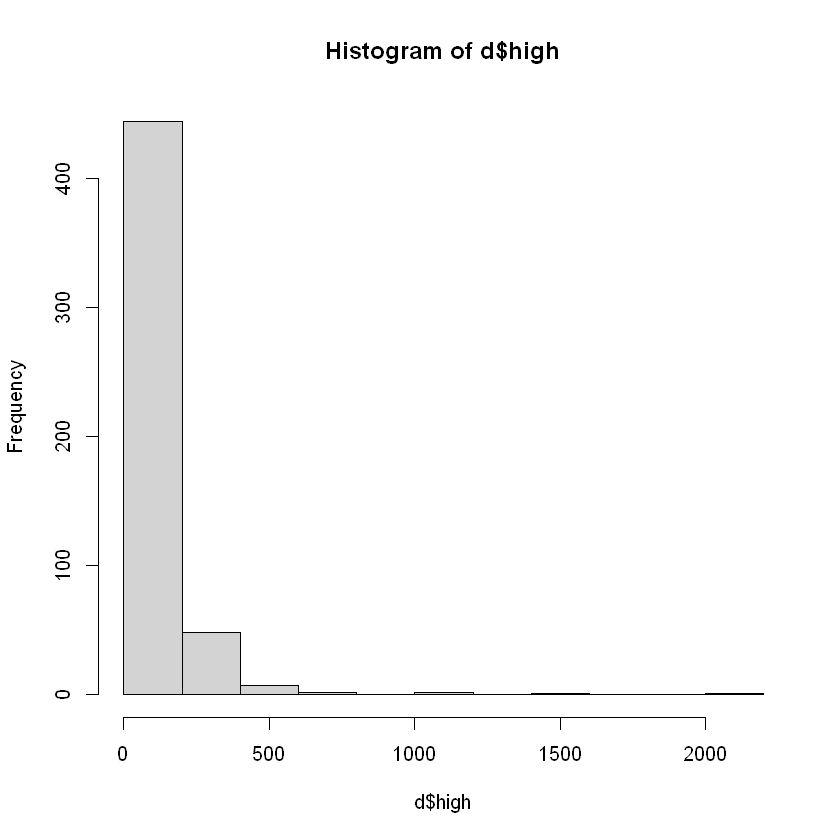

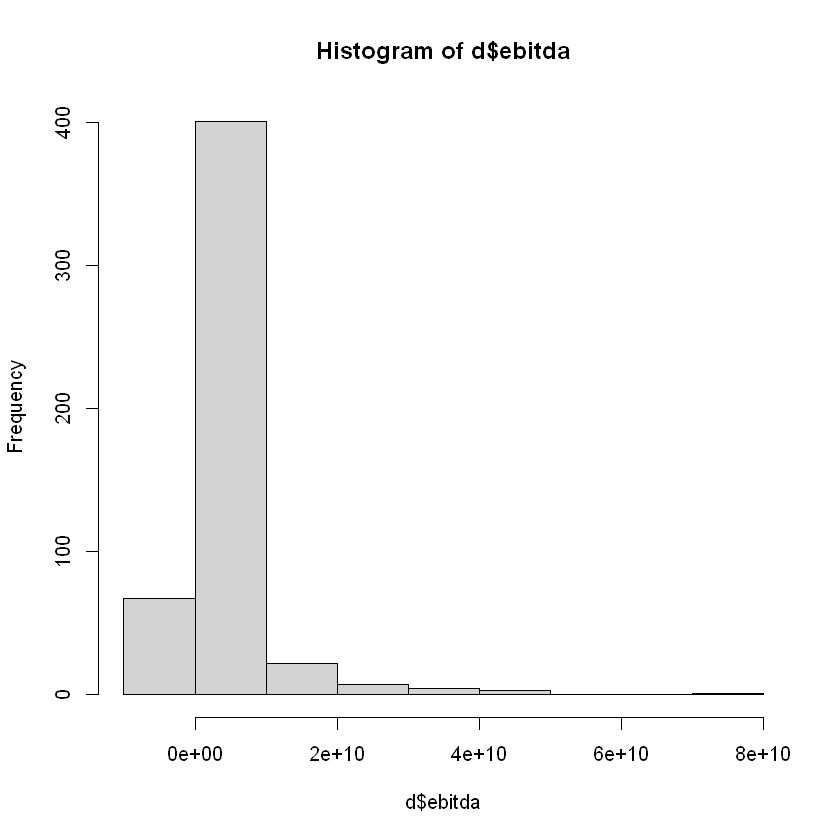

In [23]:
d <- stocks
hist(d$price)
hist(d$divyield)
hist(d$eps)
hist(d$low)
hist(d$high)
hist(d$ebitda)

### Correlation Matrix

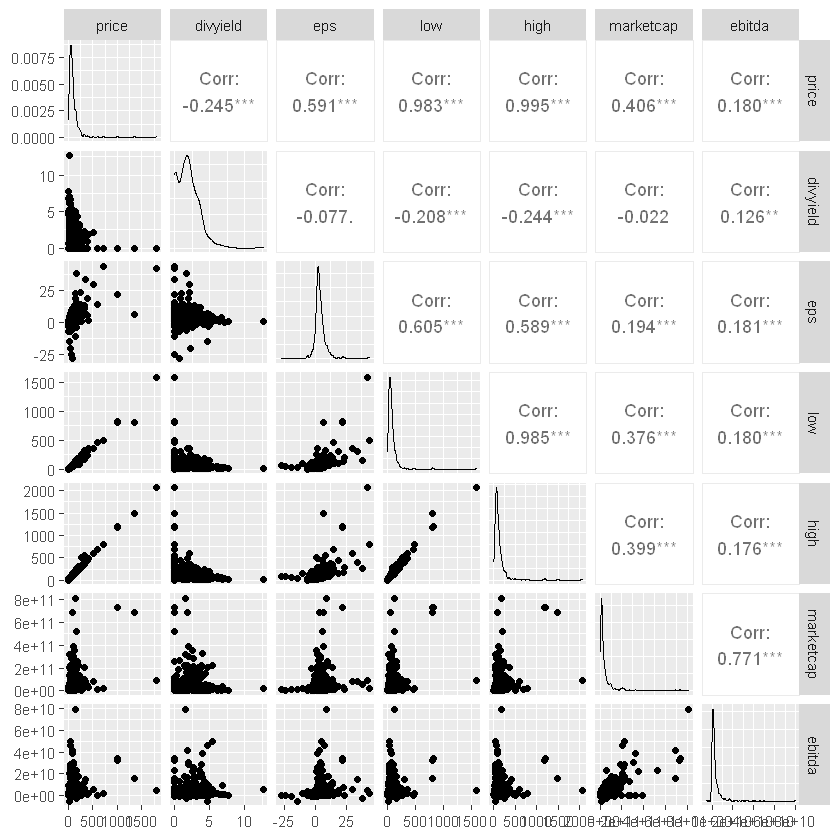

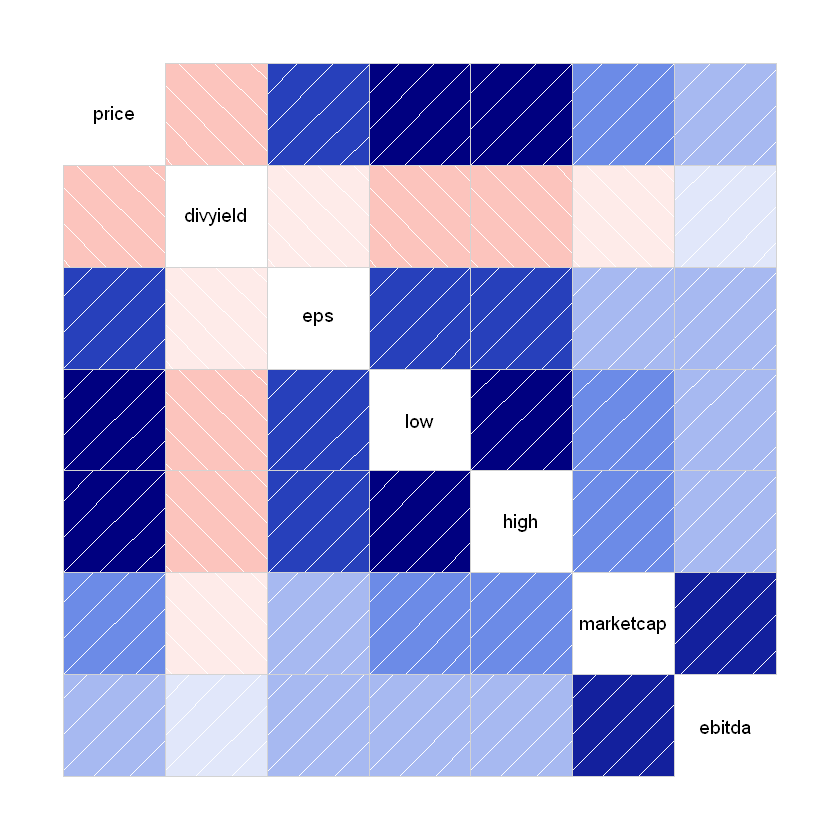

In [24]:
ggpairs(d %>% select(price,divyield,eps,low,high,marketcap,ebitda))

d %>% select(price,divyield,eps,low,high,marketcap,ebitda) %>% 
  corrgram()

Observations: The correlation between each of variables is shown on the correlation matrix.
<br>
To summarize we observe,
+ A small negative linear association between dividend yield and price (rho estimate=-0.245)
+ A moderately strong linear association between earnings per share and price (rho estimate=0.591) 
+ A relatively strong linear relationship between market cap and EBITDA with a rho estimate of 0.771
+ A very strong linear association between high and price with a rho estimate of 0.995 and also a strong linear association between low and price with a rho estimate of 0.983
<br>

## 6 . Analysis using various models

We have decided that the response variable is **Earnings/Share (eps).** <br>
Dividend yield(divyield), Market Capitalization(marketcap), Earnings before interest, taxes, depreciation, and amortization(ebitda) , Stock Price(price) are the chosen predictor variables.<br>
The 52 week high and low are not chosen as predictor variables as they are only maximum and minimum values of stock price in a year.

### Linear Regression

We will perform linear regression in R using the stocks dataset and fitting a simple linear regression that models eps as a function of divyield.<br>
The mathematical model is: eps = α + β divyield +  ϵ

In [25]:
model1 <- lm(eps ~ divyield, d)
summary(model1)



Call:
lm(formula = eps ~ divyield, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.097  -2.198  -0.841   1.422  39.794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2957     0.4014  10.701   <2e-16 ***
divyield     -0.2858     0.1645  -1.737   0.0829 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.678 on 503 degrees of freedom
Multiple R-squared:  0.005965,	Adjusted R-squared:  0.003989 
F-statistic: 3.019 on 1 and 503 DF,  p-value: 0.08293


Observation:<br>

We can see that divyieldis negatively correlated to eps.<br>
But it is not statistically significant.<br>

### Regression Diagnostics


We will check if the four assumptions of linear regression for this model are met:
+ The error terms are independent of each other (i.e. the error term of one observation is independent of another observation)
+ The errors are normally distributed
+ The errors are distributed with a mean of zero
+ The errors are distributed with a constant variance (i.e. the assumption of homoscedasticity)


#### Assumption of Normality

We will plot a histogram for the residuals and perform Shapiro-Wilk Normality Test.


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.7392, p-value < 2.2e-16


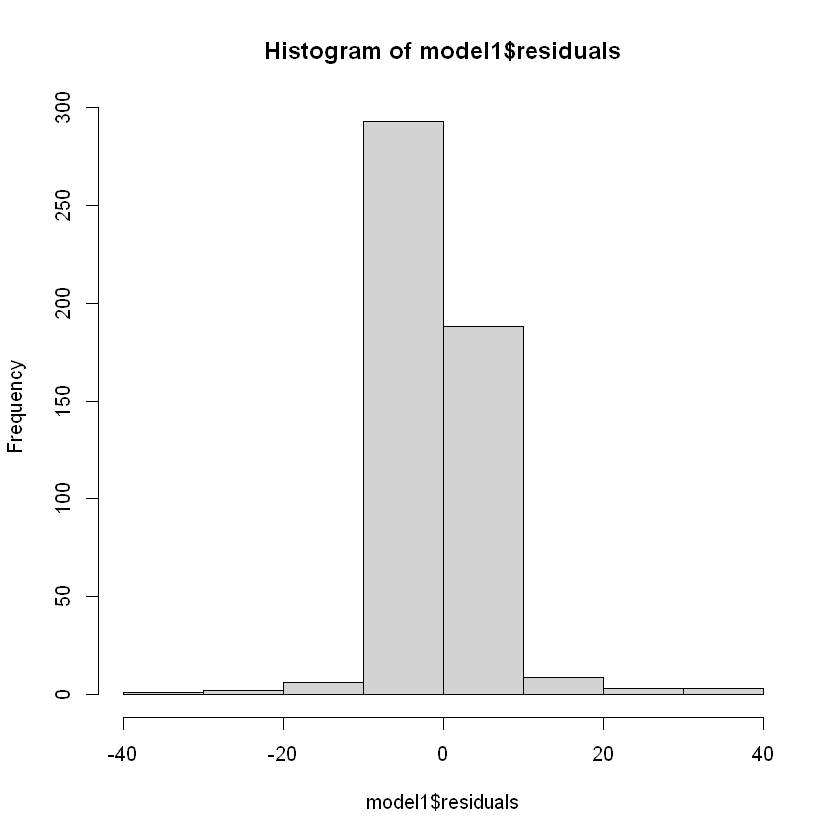

In [26]:
hist(model1$residuals)
shapiro.test(model1$residuals)

By visual inspection residuals seem to be normally distributed. <br>
The Shapiro-Wilk Normality Test gives the p value < 0.05<br>
This says that, we can reject the null hypothesis that the residuals are normally distributed.

Let us perform the remaining tests..

#### Assumption of a Zero Mean

We can use the t.test function to test if the mean of a variable is statistically significantly different than zero.

In [27]:
t.test(model1$residuals)


	One Sample t-test

data:  model1$residuals
t = 1.0415e-15, df = 504, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4958908  0.4958908
sample estimates:
   mean of x 
2.628742e-16 


p-value = 1<br>
Thus there here is no evidence in the data to reject the assumption that the mean of the residuals is equal to zero.
This also confirms that residuals are are not normally distributed around 0. <br>

#### Assumption of Constant Variance

We will plot()the residuals versus the predicted eps values.

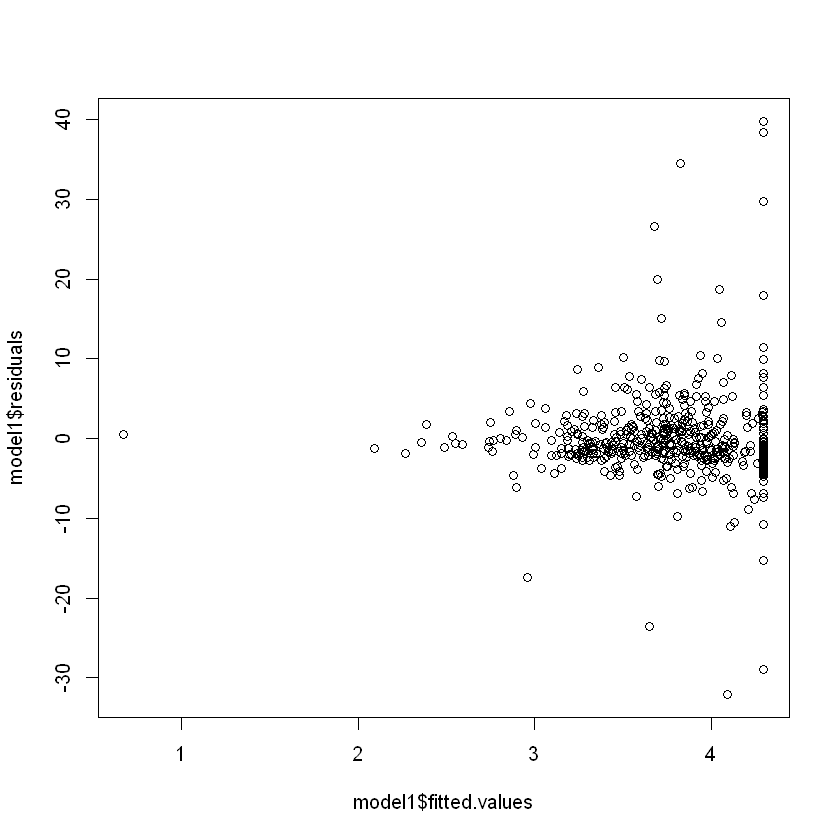

In [28]:
plot(model1$fitted.values, model1$residuals)

We can clearly see that the residuals, and the variance of the residuals certainly doesn’t appear constant across all levels of the fitted values for eps.
<br>
We have concluded that for the model 1:
+ The assumption of normality is not met
+ The assumption of mean zero is not met
+ The assumption of constant variance is not met

<br>
We will recheck the scatter plot of divyield vs eps since the model1 seems completely inappropriate.

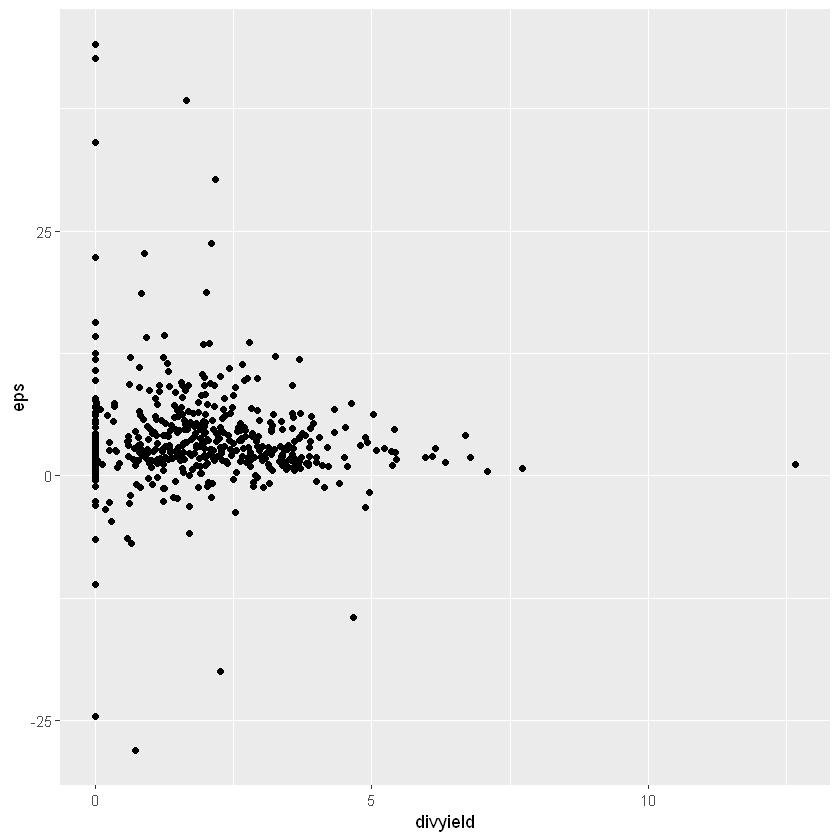

In [29]:
ggplot(d) + geom_point(aes(x=divyield, y=eps))

From this graph, it’s clear that the relationship between eps and divyield exhibits a high degree of non-linearity. 
<br>
With this in mind, we will try other models(using different predictor variables) in order to use linear regression.



Call:
lm(formula = eps ~ marketcap, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.311  -2.197  -0.685   1.374  40.696 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.150e+00  2.834e-01  11.115  < 2e-16 ***
marketcap   1.226e-11  2.763e-12   4.437 1.12e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.586 on 503 degrees of freedom
Multiple R-squared:  0.03766,	Adjusted R-squared:  0.03575 
F-statistic: 19.68 on 1 and 503 DF,  p-value: 1.123e-05



	One Sample t-test

data:  model2$residuals
t = 1.104e-15, df = 504, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4879209  0.4879209
sample estimates:
   mean of x 
2.741726e-16 



	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.73791, p-value < 2.2e-16


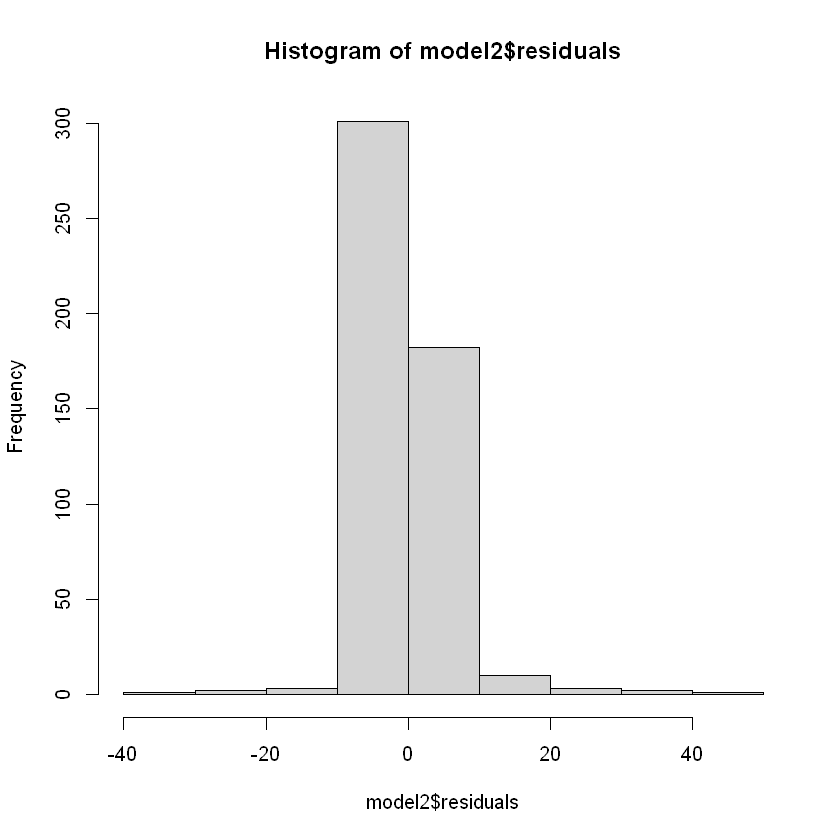

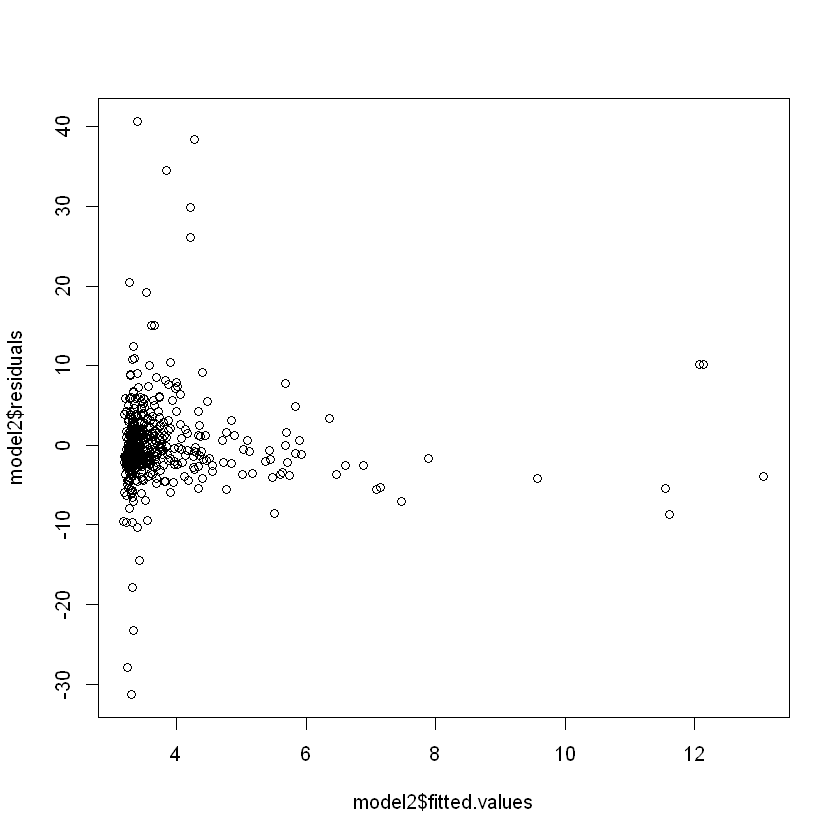

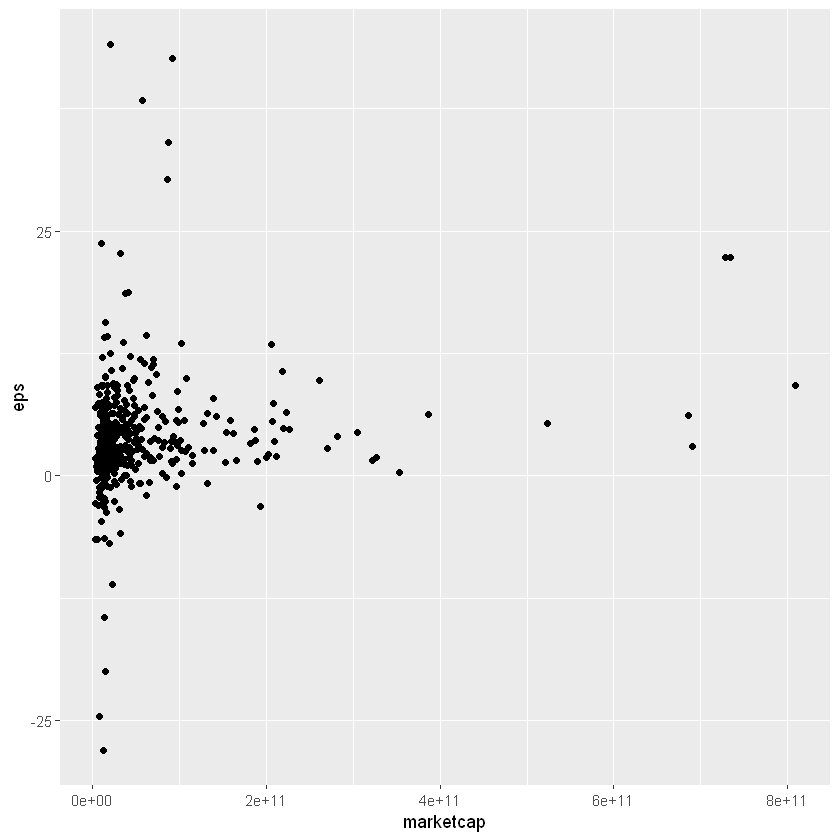

In [30]:
model2 <- lm(eps ~ marketcap ,d )
summary(model2)

hist(model2$residuals)
t.test(model2$residuals)
shapiro.test(model2$residuals)
plot(model2$fitted.values, model2$residuals)
ggplot(d) + geom_point(aes(x=marketcap, y=eps))

Observation: From this graph, it’s clear that the relationship between marketcap and eps exhibits a high degree of non-linearity. 
<br> 
We can clearly see that the residuals, and the variance of the residuals certainly doesn’t appear constant across all levels of the fitted values for eps.
<br>
We have concluded that for the model 2:
+ The assumption of normality is not met
+ The assumption of mean zero is not met 
+ The assumption of constant variance is not met
<br>


Call:
lm(formula = eps ~ ebitda, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.225  -2.215  -0.722   1.242  40.523 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.215e+00  2.815e-01  11.417  < 2e-16 ***
ebitda      1.502e-10  3.647e-11   4.118 4.47e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.601 on 503 degrees of freedom
Multiple R-squared:  0.03261,	Adjusted R-squared:  0.03069 
F-statistic: 16.96 on 1 and 503 DF,  p-value: 4.472e-05



	Shapiro-Wilk normality test

data:  model3$residuals
W = 0.7345, p-value < 2.2e-16



	One Sample t-test

data:  model3$residuals
t = -7.7229e-16, df = 504, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4891995  0.4891995
sample estimates:
    mean of x 
-1.922988e-16 


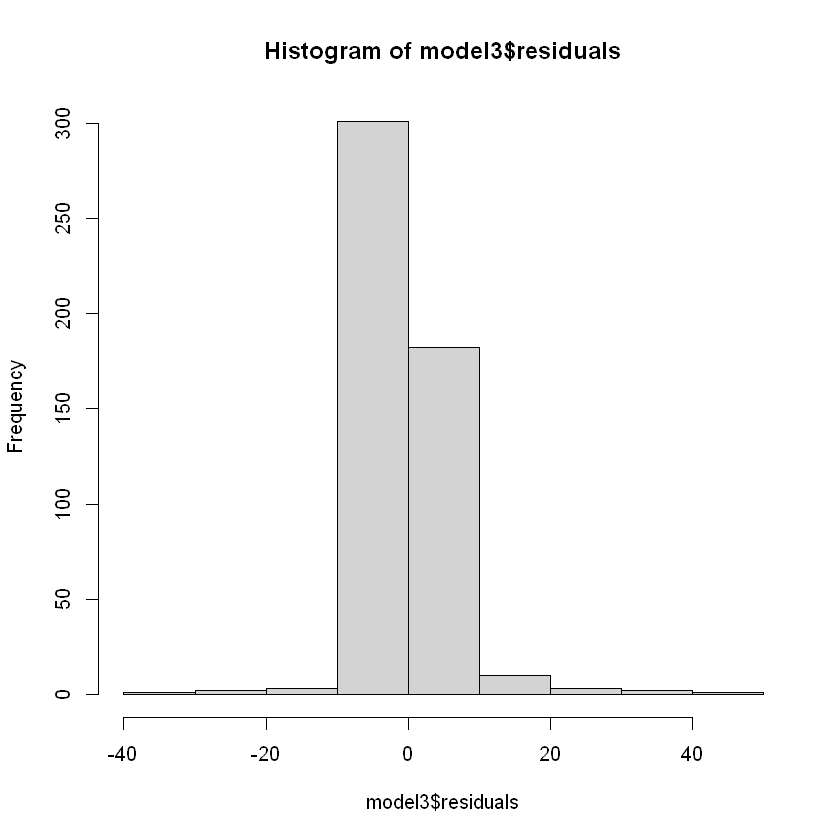

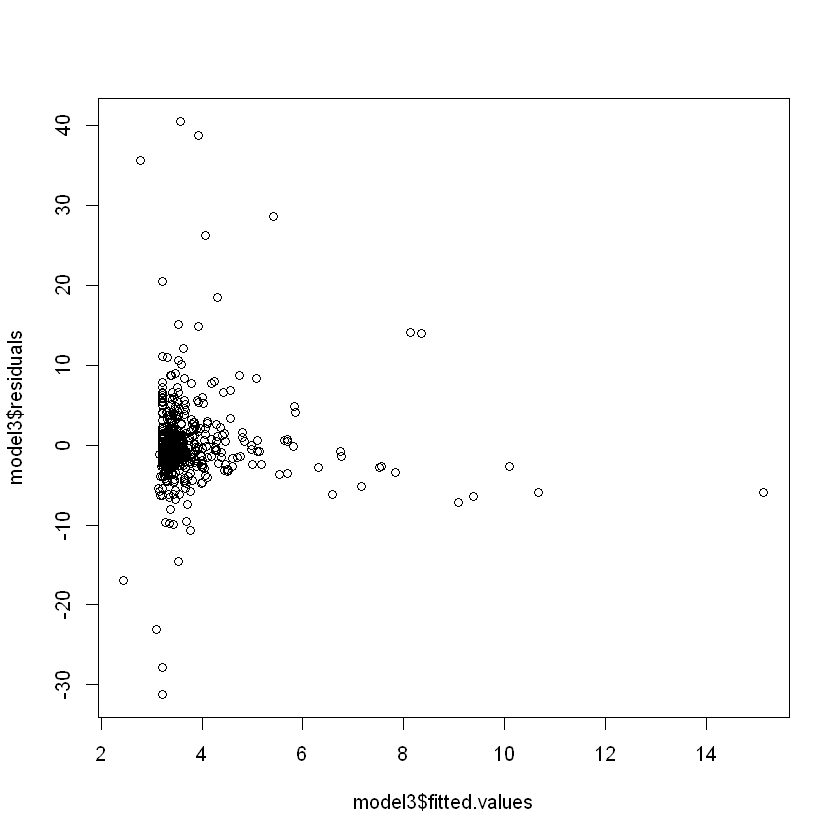

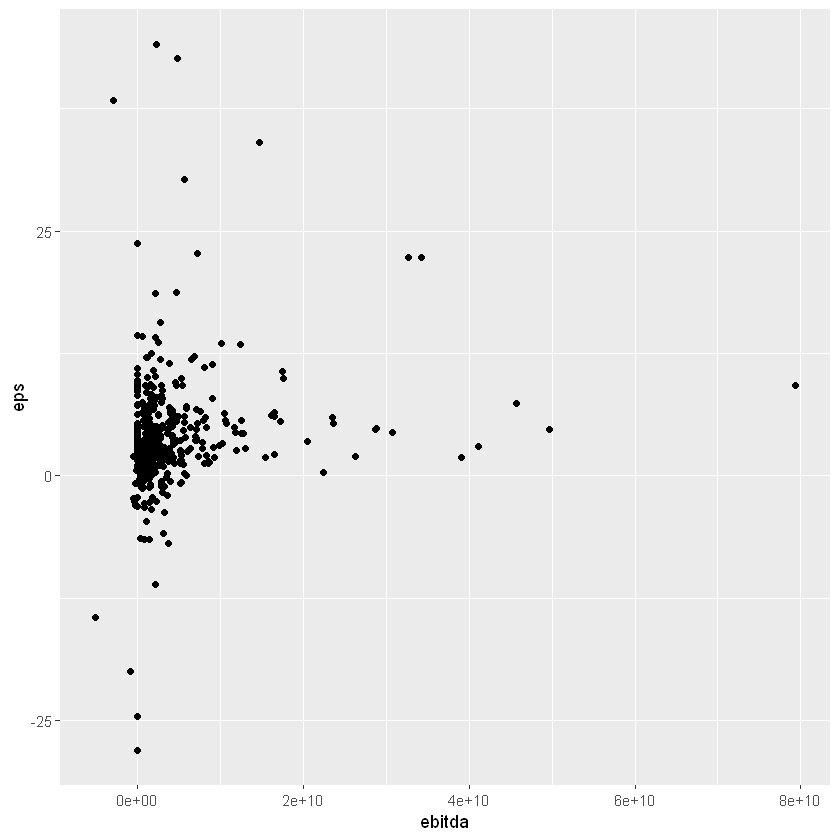

In [31]:
model3 <- lm(eps ~ebitda, d)
summary(model3)
shapiro.test(model3$residuals)
hist(model3$residuals)
t.test(model3$residuals)
plot(model3$fitted.values, model3$residuals)
ggplot(d) + geom_point(aes(x=ebitda, y=eps))

Observation: We observed similar trends in model3 as seen in model2.<br>
From this graph, it’s clear that the relationship between eps and ebitda exhibits a high degree of non-linearity. 
<br> 
We can clearly see that the residuals, and the variance of the residuals certainly doesn’t appear constant across all levels of the fitted values for eps.
<br>
We have concluded that for the model 3:
+ The assumption of normality is not met
+ The assumption of mean zero is not met 
+ The assumption of constant variance is not met
<br>


Call:
lm(formula = eps ~ price, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.279  -1.273  -0.189   1.328  33.086 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.156527   0.258377   4.476 9.41e-06 ***
price       0.025014   0.001522  16.434  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.593 on 503 degrees of freedom
Multiple R-squared:  0.3494,	Adjusted R-squared:  0.3481 
F-statistic: 270.1 on 1 and 503 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  model4$residuals
W = 0.72382, p-value < 2.2e-16



	One Sample t-test

data:  model4$residuals
t = 4.6304e-16, df = 504, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4011972  0.4011972
sample estimates:
   mean of x 
9.455402e-17 


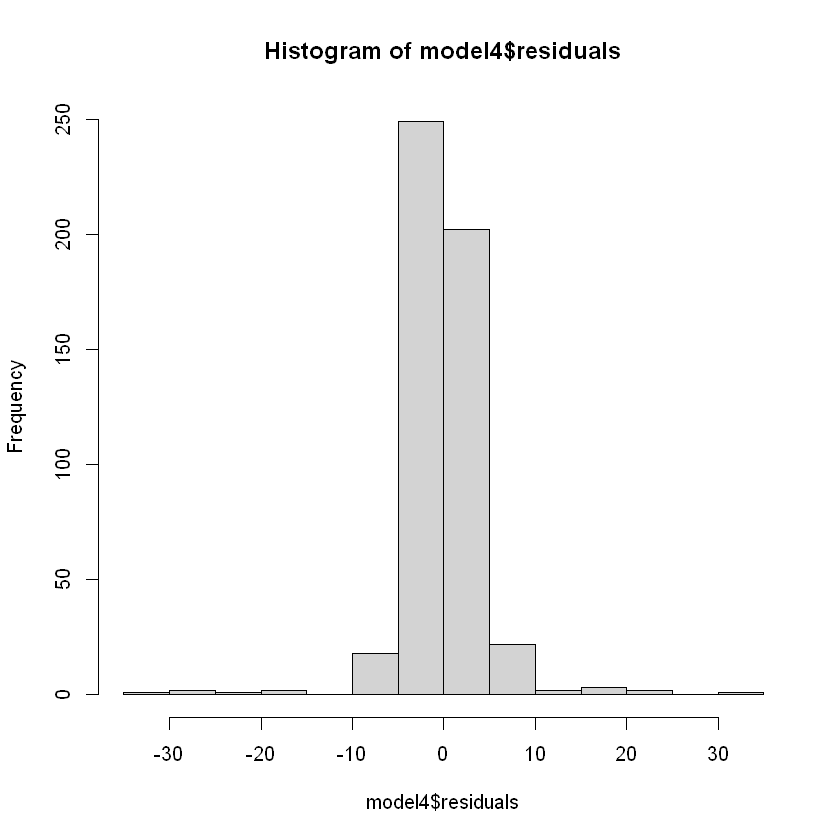

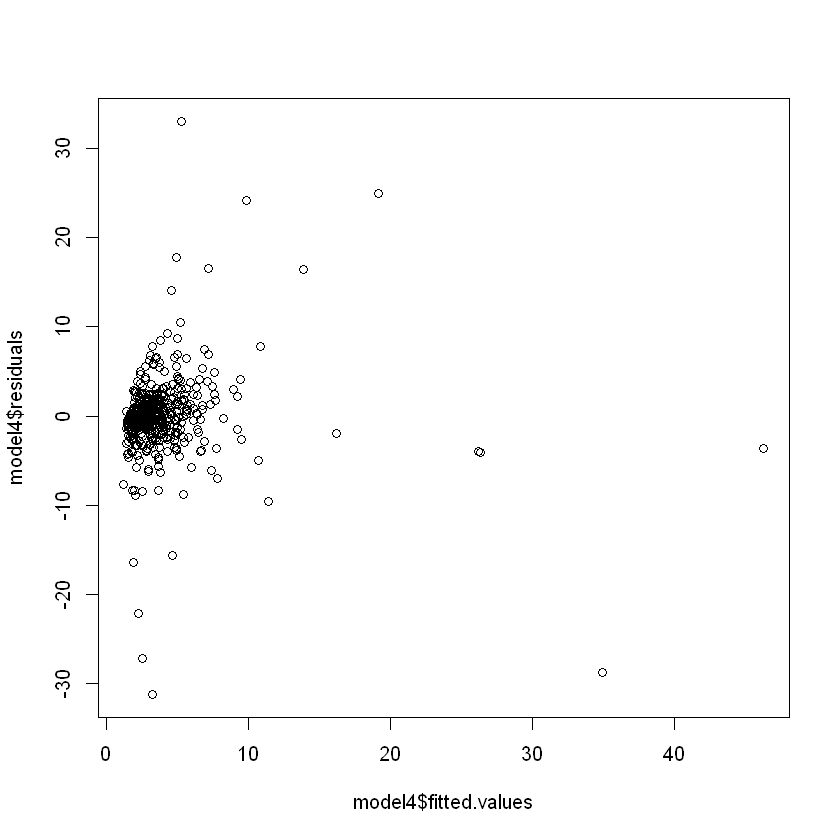

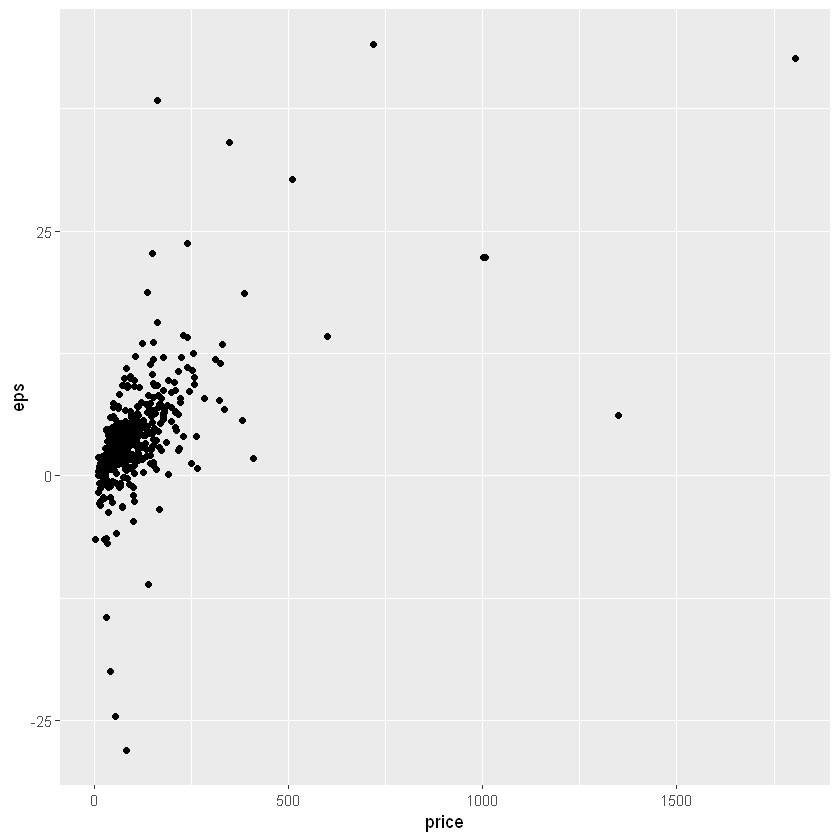

In [32]:
model4 <- lm(eps ~ price, d)
summary(model4)
shapiro.test(model4$residuals)
hist(model4$residuals)
t.test(model4$residuals)
plot(model4$fitted.values, model4$residuals)
ggplot(d) + geom_point(aes(x=price, y=eps))

Observation: From this graph, it’s clear that the relationship between eps and price exhibits a low degree of non-linearity. 
<br> 
We can clearly see that the residuals, and the variance of the residuals certainly doesn’t appear constant across all levels of the fitted values for eps.
<br>

### Multiple Regressions

Ordinary inear squares (OLS) regression compares the response of a dependent variable given a change in some explanatory variables. 
However, a dependent variable is rarely explained by only one variable. In this case,we can use multiple regression, which attempts to explain a dependent variable using more than one independent variable.
Multiple regressions can be linear and nonlinear.

**Multiple regressions** are based on the assumption that there is a linear relationship between both the dependent and independent variables. 
It also assumes no major correlation between the independent variables.

Assuming the data is related to stocks,<br>
The above assumptions are fairly true as there is certain amount of linear relationship between dependent and independent variables.<br>
And the major correlation between the independent variablesa are quite minimal.

The way to do multiple regression in R is,<br>
lm (response_variable ~ predictor_variable1 + predictor_variable2 +..., data = data)


Call:
lm(formula = eps ~ ebitda + marketcap + price + divyield, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.866  -1.248  -0.136   1.122  34.577 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.654e-01  3.866e-01   1.463    0.144    
ebitda       2.338e-10  4.776e-11   4.895 1.33e-06 ***
marketcap   -1.861e-11  3.858e-12  -4.824 1.87e-06 ***
price        2.840e-02  1.707e-03  16.635  < 2e-16 ***
divyield     1.668e-01  1.363e-01   1.224    0.222    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.473 on 500 degrees of freedom
Multiple R-squared:  0.3868,	Adjusted R-squared:  0.3819 
F-statistic: 78.85 on 4 and 500 DF,  p-value: < 2.2e-16



	One Sample t-test

data:  model5$residuals
t = -1.8594e-16, df = 504, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.3894818  0.3894818
sample estimates:
    mean of x 
-3.686116e-17 



	Shapiro-Wilk normality test

data:  model5$residuals
W = 0.73123, p-value < 2.2e-16


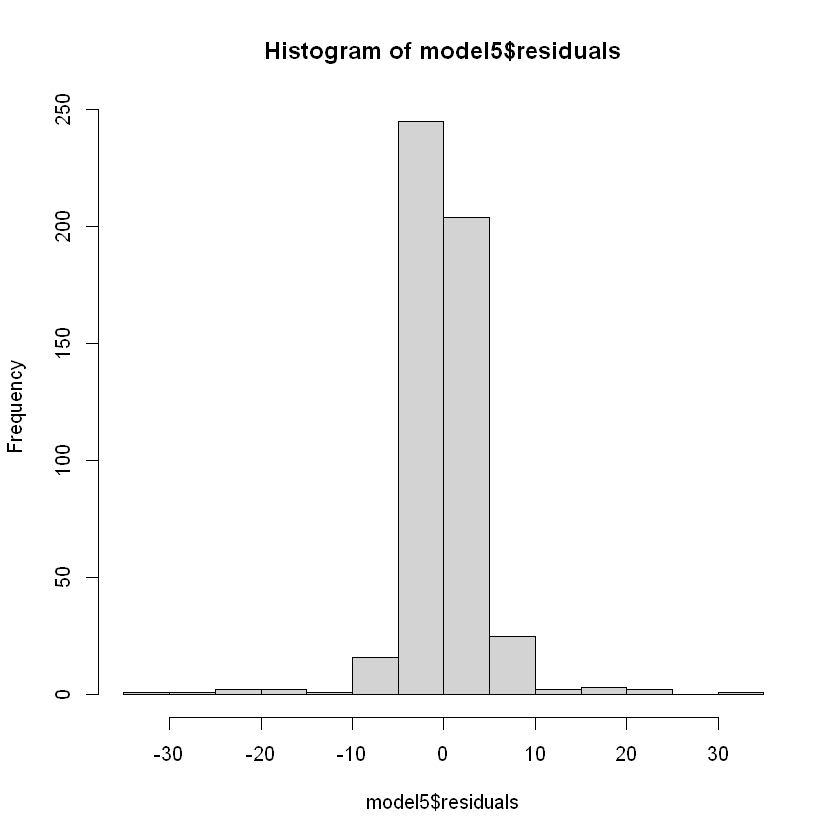

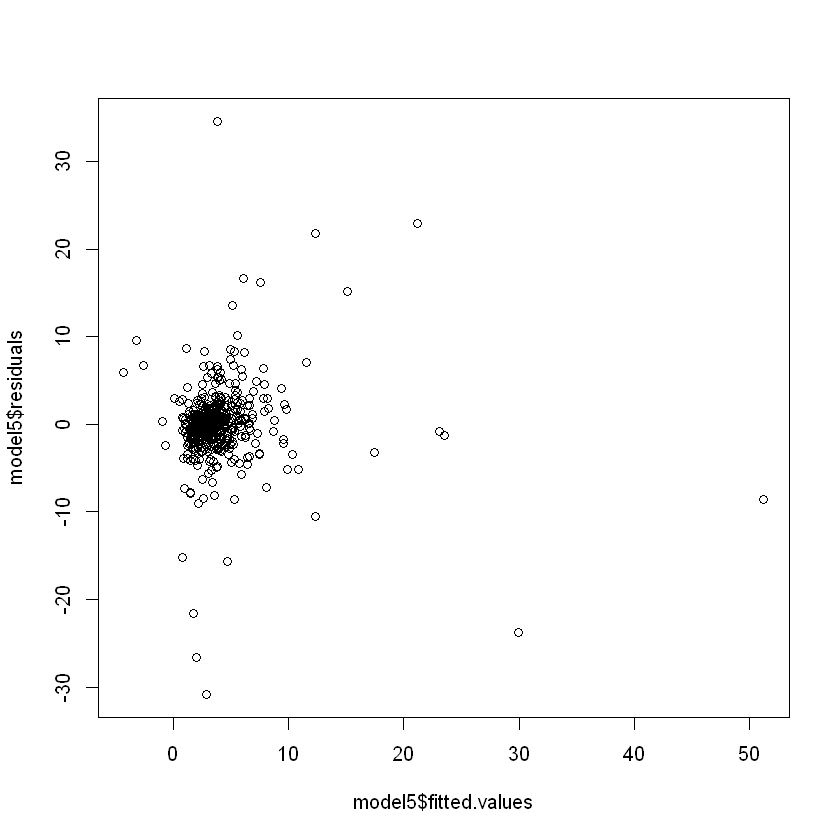

In [33]:
model5 <- lm(eps ~ ebitda+ marketcap + price+  divyield, d)
summary(model5)

hist(model5$residuals)
t.test(model5$residuals)
shapiro.test(model5$residuals)
plot(model5$fitted.values, model5$residuals)


Observation: From this graph, it’s clear that the relationship between eps and (ebitda+ marketcap + price+ divyield) exhibits less degree of non-linearity. This multiple linear regression is non-linear.
<br> 


Looking at model 5 we can try to make an appropriate set of transformations to the variables in the model to arrive at a linear relationship between the transformed variables in order to use linear regression.
This is the custom model (model6)


Call:
lm(formula = eps ~ log(price) + ebitda + log(marketcap) + divyield, 
    data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.833  -1.496   0.019   1.561  32.149 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.088e+00  6.354e+00  -1.116  0.26513    
log(price)      4.442e+00  3.058e-01  14.528  < 2e-16 ***
ebitda          1.064e-10  3.935e-11   2.704  0.00709 ** 
log(marketcap) -3.898e-01  2.848e-01  -1.369  0.17173    
divyield        3.568e-01  1.432e-01   2.491  0.01307 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.617 on 500 degrees of freedom
Multiple R-squared:  0.3465,	Adjusted R-squared:  0.3412 
F-statistic: 66.26 on 4 and 500 DF,  p-value: < 2.2e-16



	One Sample t-test

data:  model6$residuals
t = 3.9331e-16, df = 504, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4020894  0.4020894
sample estimates:
  mean of x 
8.04946e-17 



	Shapiro-Wilk normality test

data:  model6$residuals
W = 0.74653, p-value < 2.2e-16


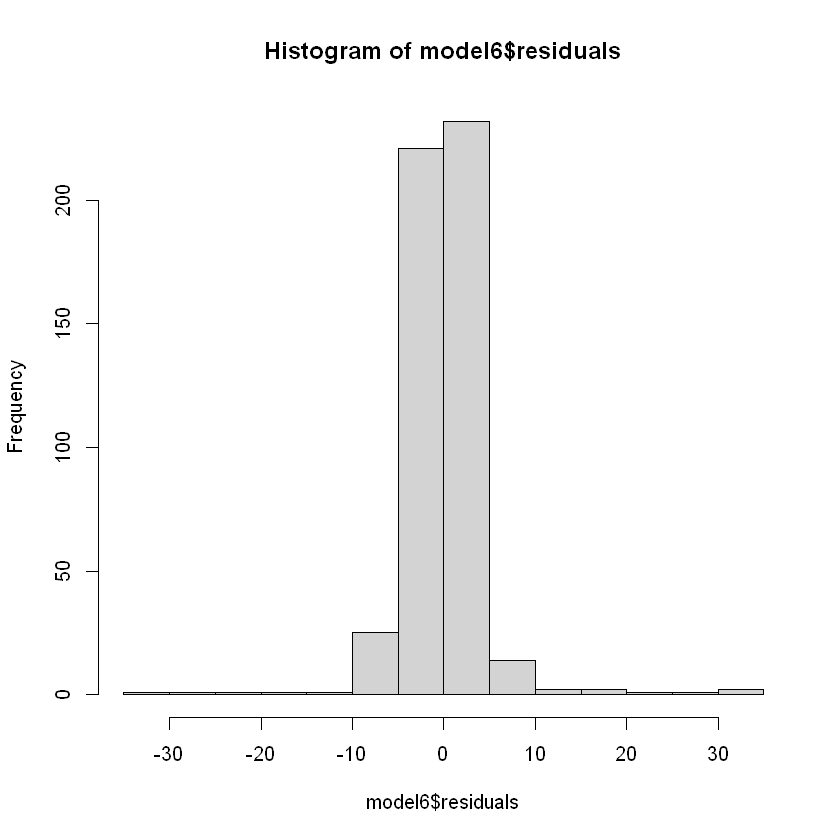

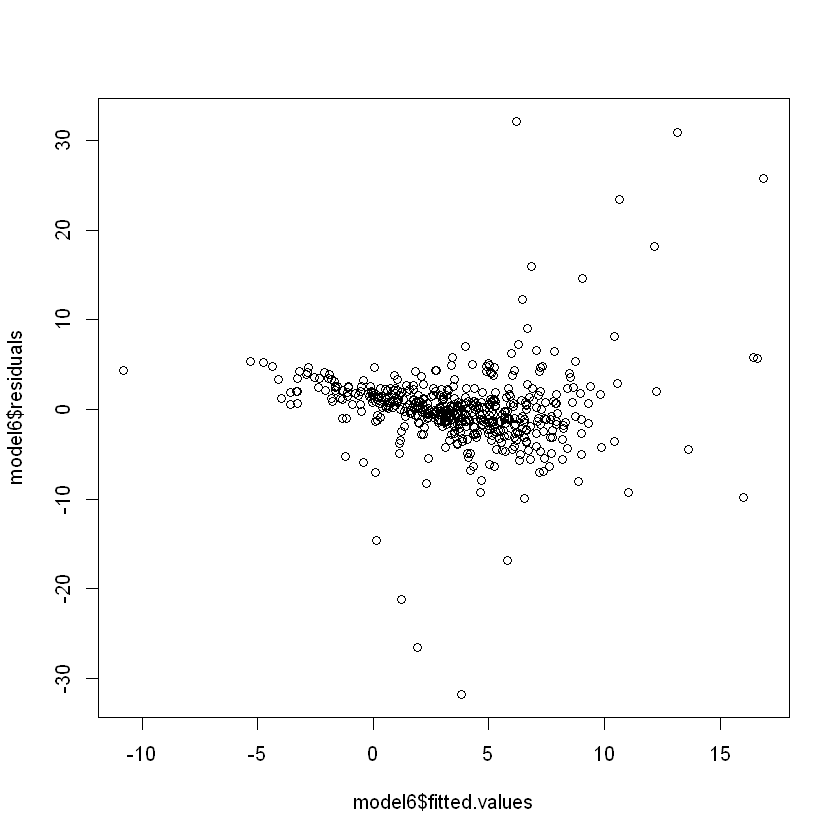

In [34]:
model6 <- lm(eps ~ log(price) + ebitda +  log(marketcap) +  divyield, d)
summary(model6)
t.test(model6$residuals)
shapiro.test(model6$residuals)
hist(model6$residuals)
plot(model6$fitted.values, model6$residuals)



#### Model performance measures

Model 6 - the custom model performs pretty well than muliple linear model. ( model 5)

We will split the data to calculate the performance measures. We will use a 70-30 split.

In [35]:
#model 5 and model6 looks better
# we will choose them for training and testing

set.seed(123)
train_idx <- sample(nrow(d), .70*nrow(d))

d_train <- d[train_idx,]
d_test <- d[-train_idx,]

In [36]:
train_mod1 <- lm(eps ~ ebitda+ marketcap + price+  divyield, d_train)
summary(train_mod1)
train_mod2 <- lm(eps ~ log(price) + ebitda +  log(marketcap) +  divyield, d_train)
summary(train_mod2)


Call:
lm(formula = eps ~ ebitda + marketcap + price + divyield, data = d_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.859  -1.236  -0.203   1.301  35.449 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.232e-01  4.907e-01   1.474    0.141    
ebitda       3.498e-10  6.773e-11   5.165 4.05e-07 ***
marketcap   -3.054e-11  5.923e-12  -5.156 4.23e-07 ***
price        2.753e-02  2.043e-03  13.473  < 2e-16 ***
divyield     2.429e-01  1.772e-01   1.371    0.171    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.499 on 348 degrees of freedom
Multiple R-squared:  0.3604,	Adjusted R-squared:  0.353 
F-statistic: 49.01 on 4 and 348 DF,  p-value: < 2.2e-16



Call:
lm(formula = eps ~ log(price) + ebitda + log(marketcap) + divyield, 
    data = d_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.790  -1.560   0.033   1.393  31.747 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.218e+01  7.815e+00  -1.559   0.1200    
log(price)      4.254e+00  3.710e-01  11.466   <2e-16 ***
ebitda          5.958e-11  5.121e-11   1.164   0.2454    
log(marketcap) -1.383e-01  3.505e-01  -0.395   0.6933    
divyield        4.126e-01  1.850e-01   2.231   0.0263 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.632 on 348 degrees of freedom
Multiple R-squared:  0.3219,	Adjusted R-squared:  0.3141 
F-statistic: 41.29 on 4 and 348 DF,  p-value: < 2.2e-16


In [37]:
#  predicting the response variable in testing dataset using the predictor variable in the same dataset(training dataset)

prd1 <- predict(train_mod1, d_test)
str(prd1)
prd2 <- predict(train_mod2, d_test)
str(prd2)

 Named num [1:152] 6.35 1.63 1.98 3.82 3.84 ...
 - attr(*, "names")= chr [1:152] "1" "3" "6" "8" ...
 Named num [1:152] 8.77 2.59 2.56 6.69 4.79 ...
 - attr(*, "names")= chr [1:152] "1" "3" "6" "8" ...


We will use a function to calcualte the actual model performance metrics.Mainly three particular error measures:
+ Root Mean Squared Error (RMSE)
+ Mean Absolute Error (MAE)
+ Mean Absolute Percentage Error (MAPE)

In [38]:
calc_performance <- function(actual, pred) {
  rmse <- sqrt(mean((actual - pred)**2))
  mae <- mean(abs(actual - pred))
  rsq <- 1 - (sum((actual - pred)**2))/(sum((actual - mean(actual))**2))
  return(list(rmse = rmse, mae = mae, Rsquared = rsq))
  }

### Calculating model performance

In [39]:
calc_performance(d_test$eps, prd1)

calc_performance(d_test$eps, prd2)

$rmse
[1] 4.63389

$mae
[1] 2.752543

$Rsquared
[1] 0.3840456

$rmse
[1] 4.614333

$mae
[1] 2.667381

$Rsquared
[1] 0.3892338

Observation:
Both model performance are almost the same. But model 6 is better than model5 <br>
i.e custom model is better than multiple linear regression model.

We will use the model 5 as the final model, and redo regression diagonistics. 

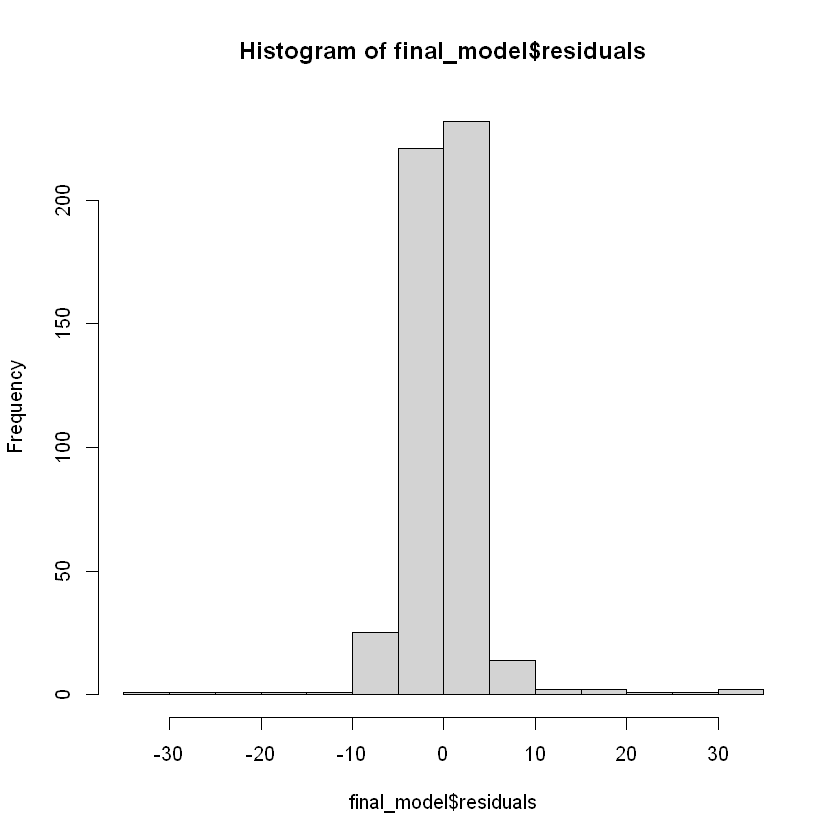

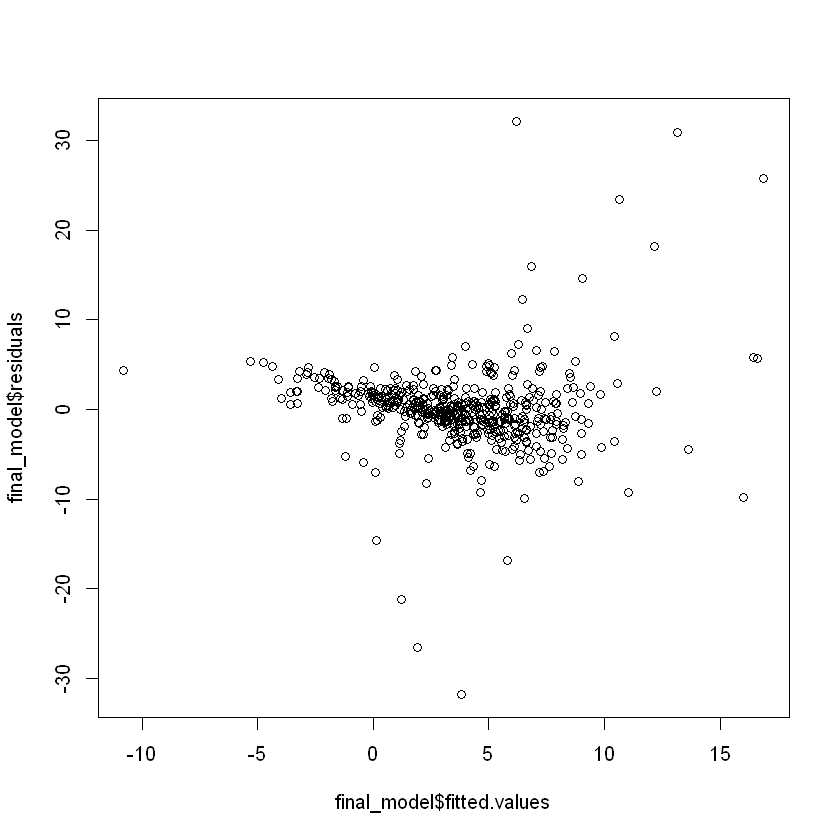

In [40]:
#using the model 6...
final_model <- lm(eps ~ log(price) + ebitda +  log(marketcap) +  divyield, d)

hist(final_model$residuals)
plot(final_model$fitted.values, final_model$residuals)

The final_model looks pretty decent enough for the prediction of the response variable eps(Earnings per Share).

We will continue to use custom control parameters and create models.

## 7 . Models using custom control parameters from different package

Before jumping into different models, let us see the Univariate case and Multivariate case in Regression Anlysis.<br>

**Regression Analyis**

Univariate case<br>
Typically we analyze the effect of one or more continuous explanatory variables on a single continuous response variable 

Multivariate case<br>
We analyze the effect of one or more continuous explanatory variables on more than one continuous response variable.

Mulitple linear regression by least-squares method

If explanatory variables are highly correlated we use Partial least squares model. <br>
The mathematical model depicting Partial least squares model for Mulitple linear regression is,<br>
<br>Y=XB+E
<br>Y-Response matrix (n*m)
<br>X=Predictor matrix (n*p)
<br>B=Coefficicent matrix (p*m)
<br>E=noise term (n*m)
<br>where,

<br>n-No. of observations
<br>m-No. of response variables
<br>p-No. of predictor continuous 

### Caret package - Classification And Regression Training 

We are using Caret package to build models using custom comtrol parameters.<br>
Caret package has several functions that attempt to streamline the model building and evaluation process, as well as feature selection and other techniques.

One of the primary tools in the package is the train function which can be used to<br>
a.Evaluate, using resampling, the effect of model tuning parameters on performance<br>
b.Choose the optimal model across these parameters<br>
c.Estimate model performance from a training set<br>

We will use trainControl function present in caret package to define custom control parameters for regression models.<br>
    
The parameters used for creating a custom control include, method, "repeatedcv".<br>
It is used to specify repeated K-fold cross-validation (and the argument repeats controls the number of repetitions). <br>
K is controlled by the 'number' argument and defaults to 10.

In [41]:
# this is a usage of traincontrol function to define a control parameter
ctrl <- trainControl(method = "repeatedcv", repeats =10)

**We will first use pslr function and then compare the results of fit.plsr model and the final model we already chose**

plsr stands for Partial Least square model

In [42]:
fit.plsr <- plsr(d$eps ~ d$ebitda+ d$marketcap + d$price +  d$divyield, dataset=d, ncomp=4,validation="CV" )
#summary of fit.plsr model
summary(fit.plsr)


Data: 	X dimension: 505 4 
	Y dimension: 505 1
Fit method: kernelpls
Number of components considered: 4

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps
CV           5.695    5.608    5.616    4.602    4.611
adjCV        5.695    5.606    5.614    4.594    4.602

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps
X       99.768  100.000    100.0   100.00
d$eps    3.772    4.002     38.5    38.68


In [43]:
#comparing with final_model
summary(final_model)


Call:
lm(formula = eps ~ log(price) + ebitda + log(marketcap) + divyield, 
    data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.833  -1.496   0.019   1.561  32.149 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.088e+00  6.354e+00  -1.116  0.26513    
log(price)      4.442e+00  3.058e-01  14.528  < 2e-16 ***
ebitda          1.064e-10  3.935e-11   2.704  0.00709 ** 
log(marketcap) -3.898e-01  2.848e-01  -1.369  0.17173    
divyield        3.568e-01  1.432e-01   2.491  0.01307 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.617 on 500 degrees of freedom
Multiple R-squared:  0.3465,	Adjusted R-squared:  0.3412 
F-statistic: 66.26 on 4 and 500 DF,  p-value: < 2.2e-16


<b>
For 4 components fit pslr model has 38.68 RMSE whereas the final model has 34.65 RMSE.<br>
It seems like the final model we selected is performing better
</b>

One more thing to observe in fit.plsr model is that as the number of components increase the RMSE value decreases. This is shown by the below plot.

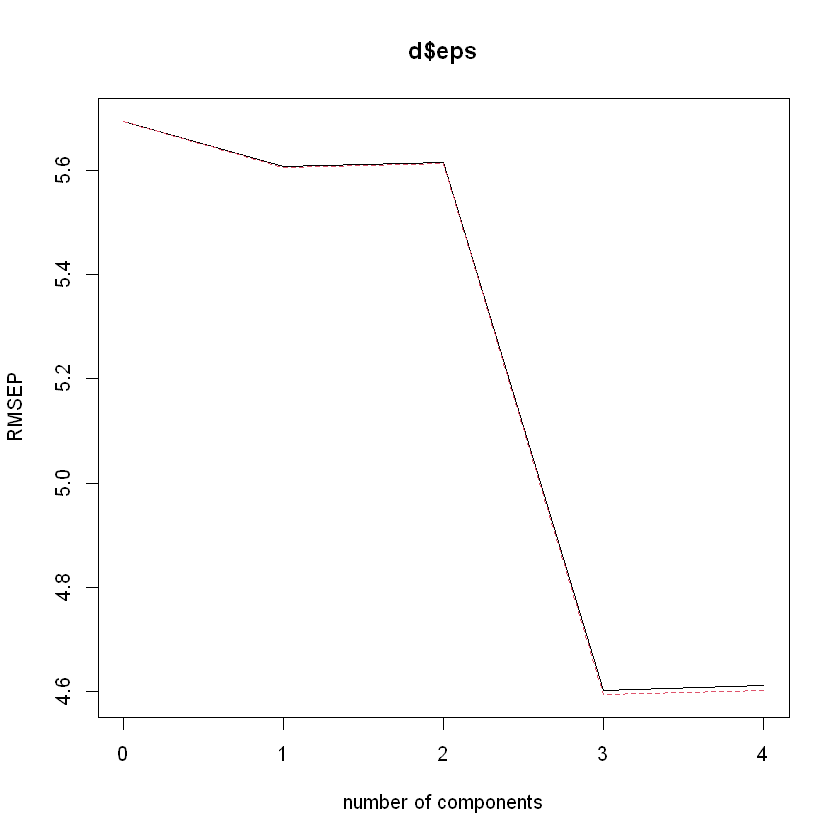

In [44]:
plot(RMSEP(fit.plsr))
# with many components in play rmse reduces

Tough fit.plsr model did not perform well than final_model, we will split the dataset and train the fit.plsr model.<br>
This gives extra proof and a better idea how training and testing datsets behave.`

In [45]:
# training the fit pslr model
train_fit.plsr <- plsr(d_train$eps ~ d_train$ebitda + d_train$marketcap + d_train$price + d_train$divyield, dataset=d_train, ncomp=4,validation="CV" )
summary(train_fit.plsr)

pred.plsr <- predict(train_fit.plsr,d_test)


Data: 	X dimension: 353 4 
	Y dimension: 353 1
Fit method: kernelpls
Number of components considered: 4

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps
CV           5.601    5.581    5.587    4.692    4.705
adjCV        5.601    5.578    5.583    4.678    4.690

TRAINING: % variance explained
             1 comps  2 comps  3 comps  4 comps
X             99.752  100.000   100.00   100.00
d_train$eps    1.679    2.277    35.69    36.04


Warning message:
"'newdata' had 152 rows but variables found have 353 rows"


### Models comparison

In [46]:
#comparing performance  of 2 models
calc_performance(d_test$eps, prd2)

calc_performance(d_test$eps, pred.plsr)


# rmse.plsr <- sqrt(mean((actual - pred)**2))
# rmse.fm <- sqrt(mean((actual - pred)**2))
# rmse.model5 <- sqrt(mean((actual - pred)**2))

$rmse
[1] 4.614333

$mae
[1] 2.667381

$Rsquared
[1] 0.3892338

Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"
Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"
Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"


$rmse
[1] 6.466048

$mae
[1] 3.723965

$Rsquared
[1] -10.14105

It is quite obvious that if the whole fit pslr model does not perform well than the final model, even the predicted model gives same type of result.<br>
RMSE values of fit.plsr model is greater than our final_model

### Plotting the above inferences graphically

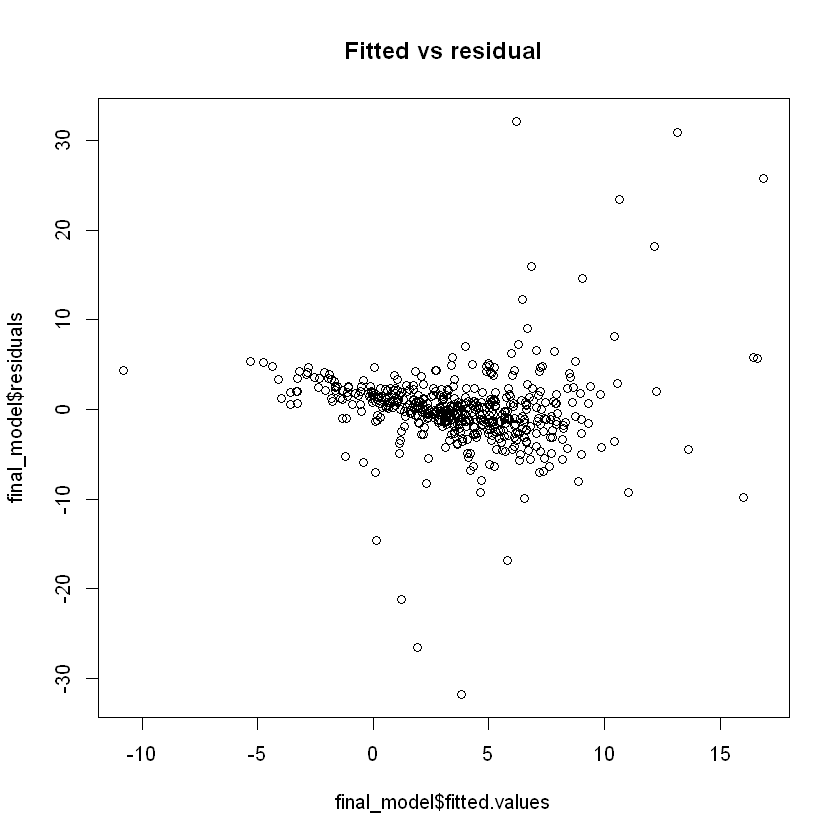

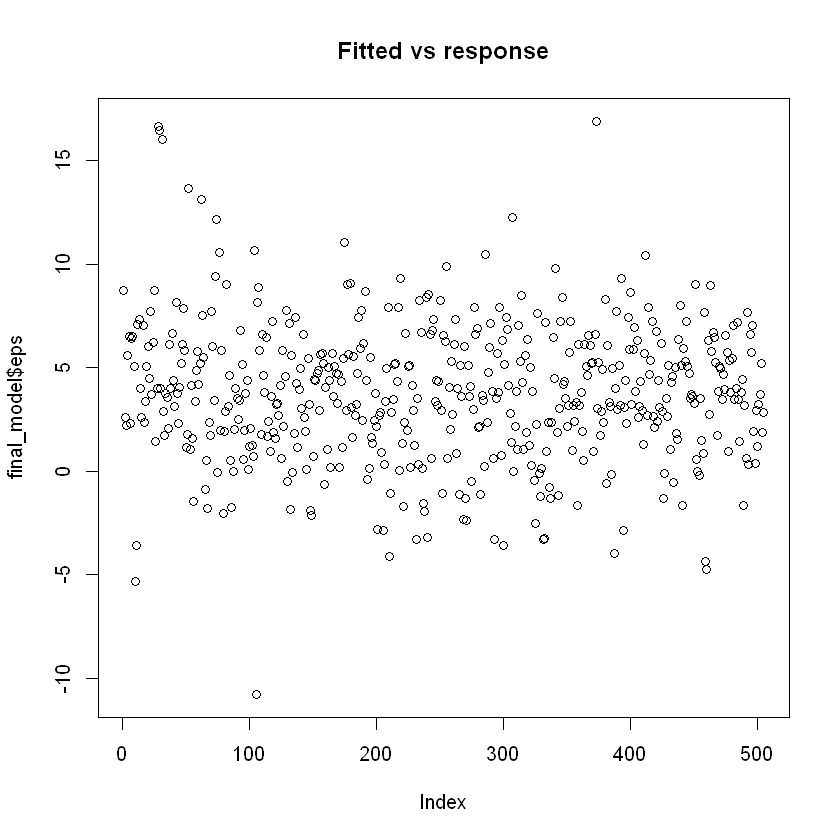

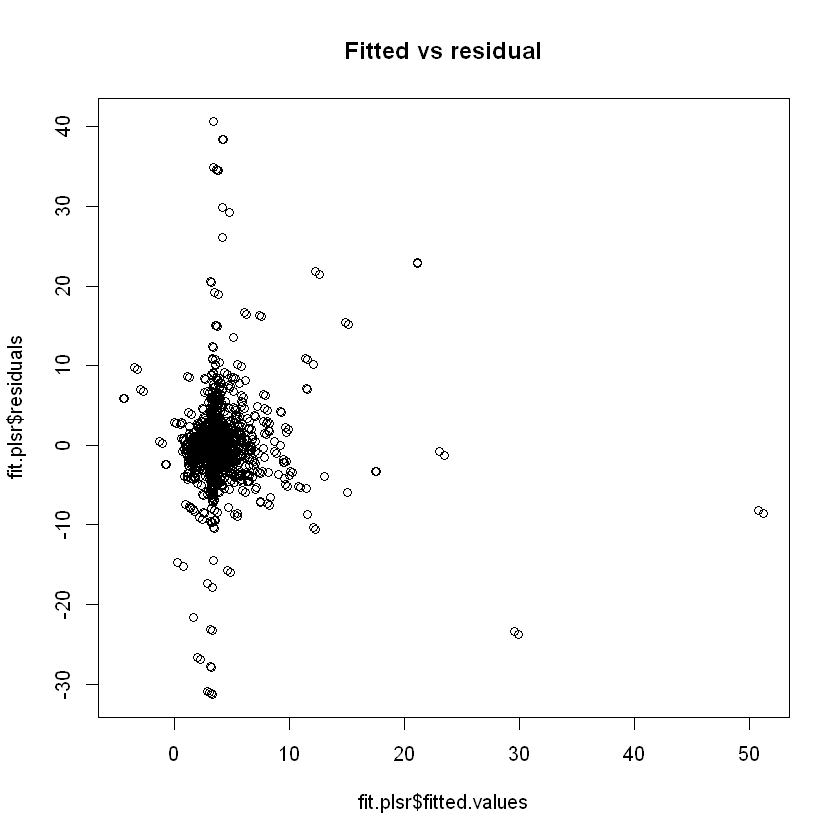

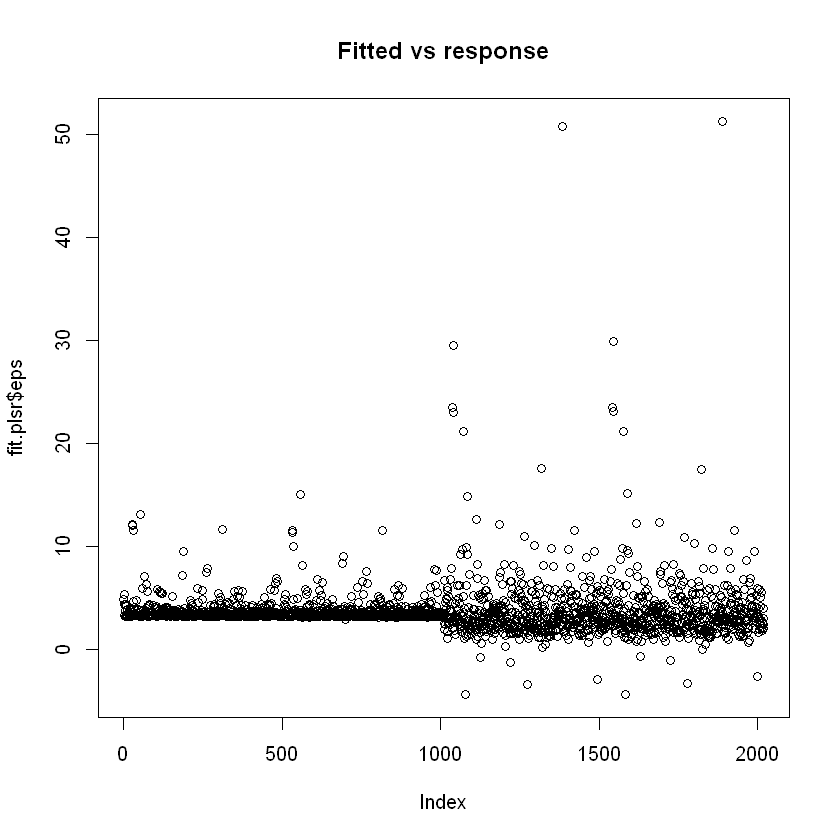

In [47]:
#final model **************

# fitted vs residual
p01 <- plot(final_model$fitted.values, final_model$residuals ,main="Fitted vs residual")
# fitted vs response
p02 <- plot(final_model$fitted.values, final_model$eps ,main="Fitted vs response" )


#plsr model*************

# fitted vs residual
p03 <- plot(fit.plsr$fitted.values, fit.plsr$residuals ,main="Fitted vs residual")
# fitted vs response
p04 <- plot(fit.plsr$fitted.values, fit.plsr$eps ,main="Fitted vs response" )


#final model is way better than plsr model

### 7.1 . Linear Regression Model using custom control parameters

From the caret package we will use simpls method and custom control parameters.

In [48]:
# running the above code again
# this is a usage of traincontrol function to define a control parameter
ctrl <- trainControl(method = "repeatedcv", repeats =10)

In [ ]:
# we will implement method 'simpls'

plsFit <- train(
  eps ~ .,
  data = d_train,
  method = "simpls",
  ## Center and scale the predictors for the training
  ## set and all future samples.
  preProc = c("center", "scale"),
  trControl = ctrl )


# final HTML will not have this code output(to shorten the length of document)

We will now look at the results and summary of plsfit model

,ncomp,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.351334,0.3866656,2.455783,1.687303,0.2065329,0.5776595
2,2,4.437164,0.4191191,2.551590,1.676882,0.2178780,0.5766545
3,3,4.448898,0.4173027,2.567126,1.666857,0.2147089,0.5725033


Partial Least Squares 

353 samples
 10 predictor

Pre-processing: centered (1025), scaled (1025) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 317, 317, 317, 318, 317, 317, ... 
Resampling results across tuning parameters:

  ncomp  RMSE      Rsquared   MAE     
  1      4.351334  0.3866656  2.455783
  2      4.437164  0.4191191  2.551590
  3      4.448898  0.4173027  2.567126

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was ncomp = 1.

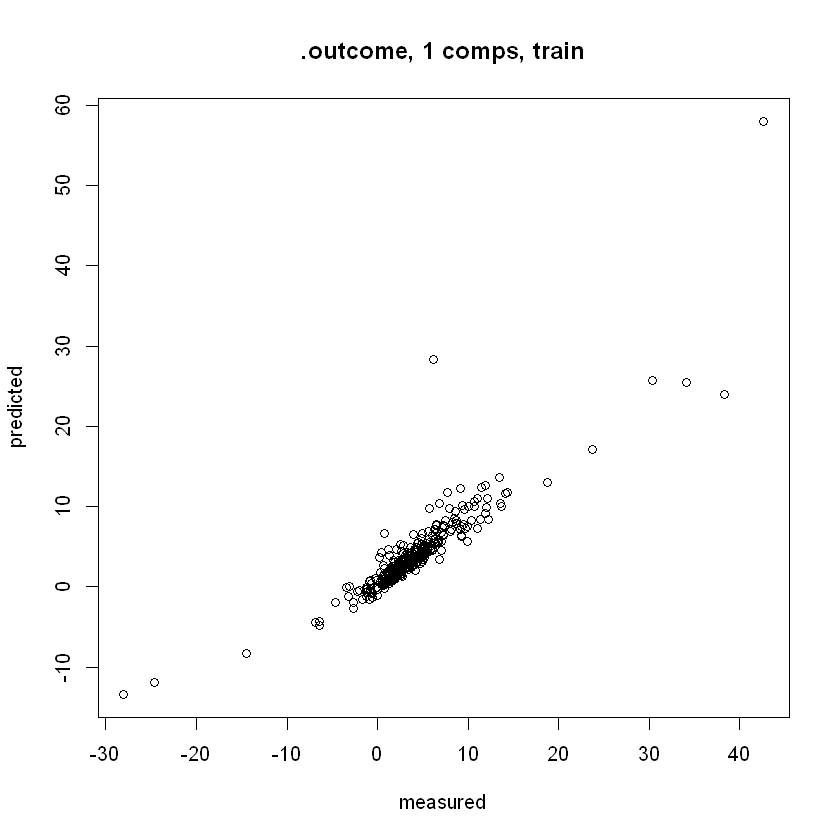

In [50]:
plsFit$results
plsFit

plot(plsFit$finalModel, col = "black")


Now we will predict the response variable in our testing dataset using the predictor variable(s) in the same dataset for the plsfit model.

In [51]:
pred.plsfit <- predict(plsFit,d_test)


### Comparing the predicted models

In [52]:
calc_performance(d_test$eps, pred.plsfit)

calc_performance(d_test$eps, prd2)

calc_performance(d_test$eps, pred.plsr)

$rmse
[1] 4.400982

$mae
[1] 2.452186

$Rsquared
[1] 0.4444075

$rmse
[1] 4.614333

$mae
[1] 2.667381

$Rsquared
[1] 0.3892338

Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"
Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"
Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"


$rmse
[1] 6.466048

$mae
[1] 3.723965

$Rsquared
[1] -10.14105

<b>
This shows that pls fit model made by using custom control parameters is better  than the final model<br>
RMSE of pls fit model - 4.40<br>
RMSE of final model - 4.61
</b>


Plotting the histograms for these models

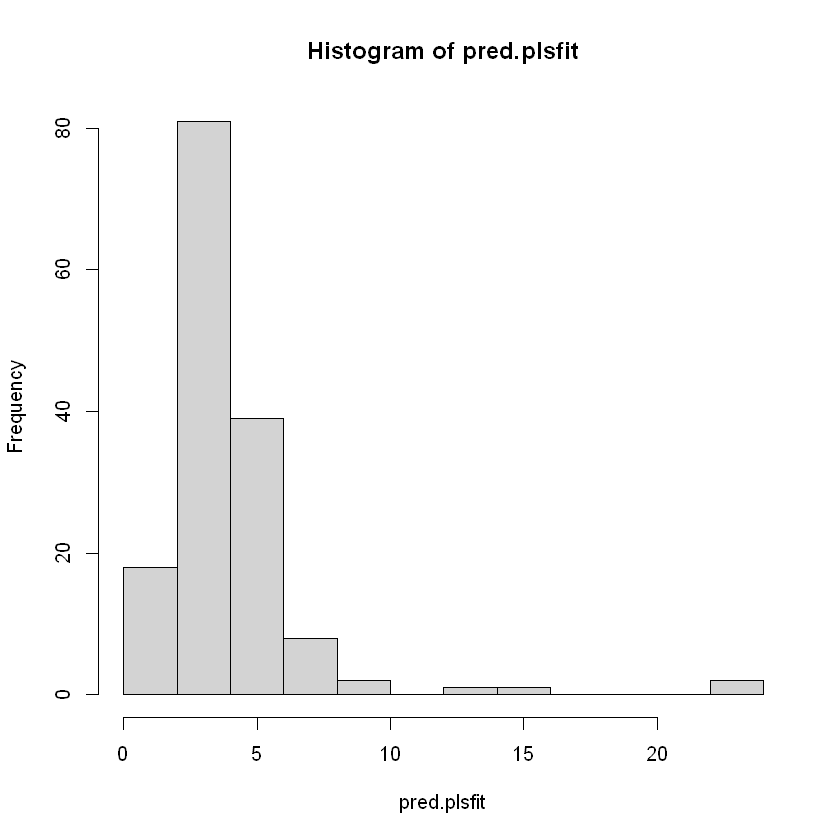

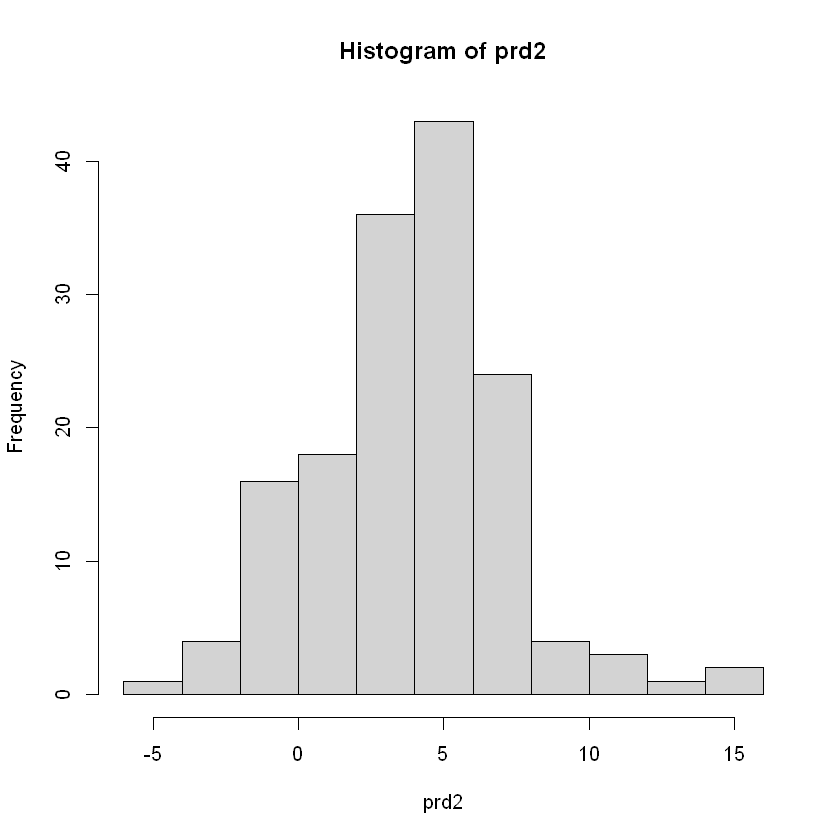

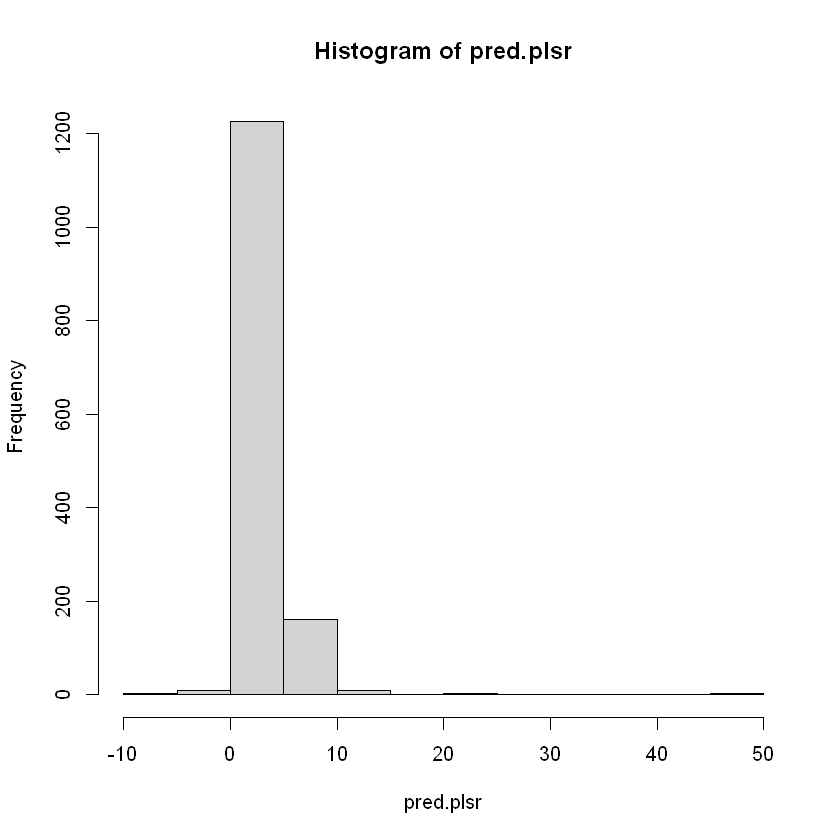

In [53]:
p1 <- hist(pred.plsfit)
p2 <- hist(prd2)
p3 <- hist(pred.plsr)

## 8 . Conclusion

In the project, we have explored linear regression models from caret package. We also modelled a multiple linear regression model. We explored custom parameters such as Cross Validation.

The performance of the Models is summarized below:

+ Simple Linear Model(model 5): RMSE was 4.63 and RSquared of 0.384
+ Custom Model(final_model): RMSE was 4.61 and RSquared of 0.380
+ Linear Regression without using Custom Control (plsr model): RMSE was 6.46 and RSquared of -10.0
+ Linear Regression using Custom Control (pls fit model): RMSE was 4.40 and RSquared of 0.440

For the Data that we have, Linear Regression models with Custom Controls and our custom model that are performing much better than other regularized models. So the response variable Earnings/Share (eps) is best determined by Linear Regression models with Custom Controls